<a href="https://colab.research.google.com/github/christinaxliu/research/blob/main/Caltech-JPL-Intern/HZExoplanetsExploration/PlanetarySystemsCompositeData/HZExoplanetsExploration_PlanetarySystemsCompositeData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

In [71]:
pd.options.mode.copy_on_write = True

In [73]:
# Constants and methods for plotting graphs

# Mapping from exoplanet type to the corresponding color in the plotting graph
exoplanet_type_colors = {
    'Terrestrial-Planets': 'blue',
    'Super-Earths': 'salmon',
    'Neptunian-Planets': 'lightskyblue',
    'Gas-Giants': 'wheat'
}

# Mapping from exoplanet type to the corresponding legend title in the plotting graph
exoplanet_type_labels = {
    'Gas-Giants': 'Gas Giants (size of Saturn or larger)',
    'Neptunian-Planets': 'Neptunian Planets (Neptune sized, smaller than Saturn)',
    'Super-Earths': 'Super Earths (larger than Earth, smaller than Neptune)',
    'Terrestrial-Planets': 'Terrestrial Planets (Earth sized or smaller)'
}

exoplanet_type_with_hz_colors = {
    'Terrestrial-Planets': 'blue',
    'Super-Earths': 'salmon',
    'Neptunian-Planets': 'lightskyblue',
    'Gas-Giants': 'wheat',
    'HabitableZone-Planets': 'lime'
}

exoplanet_type_with_hz_labels = {
    'Gas-Giants': 'Gas Giants (size of Saturn or larger)',
    'Neptunian-Planets': 'Neptunian Planets (Neptune sized, smaller than Saturn)',
    'Super-Earths': 'Super Earths (larger than Earth, smaller than Neptune)',
    'Terrestrial-Planets': 'Terrestrial Planets (Earth sized or smaller)',
    'HabitableZone-Planets': 'Planets in Habitable Zone (including above four planet types)'
}

# Create the buckets array
def create_buckets(start, end, interval):
    buckets = []
    value = start
    while value <= end:
        buckets.append(value)
        value += interval
    return buckets

# Plot selected exoplanets with sizeable circles in proportion to the exoplanets' radii
def plot_selected_exoplanets_with_size(ax, #axes object for plotting graph
                                  exoplanets_data, # DataFrame object that contains exoplanet data
                                  x_field, # Data field for x axis
                                  y_field, # Data field for y axis
                                  size_field, # Data field for the star size
                                  is_selected, # Whether the current data entry is selected or not
                                  color, # Color for the data points in the graph
                                  edgecolors, # Edge color for the data points in the graph
                                  label, # Legend lable for the data points in the graph
                                  scale_size # Scale proportion for circle representing star in graph
                                  ):
    x = exoplanets_data[x_field][is_selected]
    y = exoplanets_data[y_field][is_selected]
    size = exoplanets_data[size_field][is_selected] * scale_size

    ax.scatter(x=x,
               y=y,
               c=color,
               s=size,
               edgecolors=edgecolors,
               label=label)

# Plot exoplanets with sizeable circles in proportion to the exoplanets' radii
def plot_exoplanets_with_size(ax, exoplanets_data, x_field, y_field, size_field, type_field, hz_status_field, scale_size, edgecolors, exoplanet_color_map, exoplanet_label_map):
    #for exoplanet_type in exoplanet_type_labels:
    for exoplanet_type in exoplanet_label_map:
        plot_selected_exoplanets_with_size(ax=ax,
                                      exoplanets_data=exoplanets_data,
                                      x_field=x_field,
                                      y_field=y_field,
                                      size_field=size_field,
                                      is_selected=exoplanets_data[type_field].map(lambda x: x == exoplanet_type),
                                      #color=exoplanet_type_colors[exoplanet_type],
                                      color=exoplanet_color_map[exoplanet_type],
                                      #color=exoplanets_data[hz_status_field].map(lambda x: 'lime' if (x == 'In HZ') else exoplanet_type_colors[exoplanet_type]),
                                      edgecolors=edgecolors,
                                      #label=exoplanet_type_labels[exoplanet_type],
                                      label=exoplanet_label_map[exoplanet_type],
                                      scale_size=scale_size)

# Set legend with fixed size
def set_legend_size(legend, legend_count, legend_size):
    for i in range (legend_count):
        legend.legend_handles[i]._sizes = [legend_size]

In [74]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
exoplanets_filename = '/content/drive/My Drive/Colab Notebooks/HZExoplanetExploration/PlanetarySystemsCompositeData/NASA-EA-03-10-2024-HZs-07-13-2024-Mtg.csv'
exoplanets_data = pd.read_table(exoplanets_filename,
                                skiprows=89,
                                sep=',',
                                header=None,
                                index_col=None,
                                names = ['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility', 'pl_controv_flag',
                                          'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim',
                                          'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim',
                                          'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim',
                                          'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim',
                                          'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim',
                                          'ttv_flag', 'st_spectype', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim',
                                          'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim',
                                          'st_metratio', 'st_logg', 'st_loggerr1', 'st_loggerr2', 'st_logglim', 'rastr', 'ra', 'decstr', 'dec',
                                          'sy_dist', 'sy_disterr1', 'sy_disterr2', 'sy_vmag', 'sy_vmagerr1', 'sy_vmagerr2', 'sy_kmag', 'sy_kmagerr1', 'sy_kmagerr2',
                                          'sy_gaiamag', 'sy_gaiamagerr1', 'sy_gaiamagerr2',
                                          'placeholder1', 'placeholder2', 'raw_data_calc_orb_sma', 'placeholder3', 'raw_data_tsurf_k', 'raw_data_tsurf_c'],
                                skipfooter=0,
                                engine='python')

In [124]:
earth_facts_data = [['Earth','Sun',1,9,'',0,'',0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,255,0,0,0,0,'G2 V',5780,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,'','',0,'',0,15]]
earth_data_columns = ['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility', 'pl_controv_flag',
                                          'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim',
                                          'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim',
                                          'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim',
                                          'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim',
                                          'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim',
                                          'ttv_flag', 'st_spectype', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim',
                                          'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim',
                                          'st_metratio', 'st_logg', 'st_loggerr1', 'st_loggerr2', 'st_logglim', 'rastr', 'ra', 'decstr', 'dec',
                                          'sy_dist', 'sy_disterr1', 'sy_disterr2', 'sy_vmag', 'sy_vmagerr1', 'sy_vmagerr2', 'sy_kmag', 'sy_kmagerr1', 'sy_kmagerr2',
                                          'sy_gaiamag', 'sy_gaiamagerr1', 'sy_gaiamagerr2',
                                          'placeholder1', 'placeholder2', 'raw_data_calc_orb_sma', 'placeholder3', 'raw_data_tsurf_k', 'raw_data_tsurf_c']
earth_data = pd.DataFrame(earth_facts_data, columns=earth_data_columns)
earth_data

pl_name hostname  sy_snum  sy_pnum discoverymethod  disc_year disc_facility  \
0   Earth      Sun        1        9                          0                 

   pl_controv_flag  pl_orbper  pl_orbpererr1  ...  sy_kmagerr2  sy_gaiamag  \
0                0          0              0  ...            0           0   

   sy_gaiamagerr1  sy_gaiamagerr2  placeholder1  placeholder2  \
0               0               0                               

   raw_data_calc_orb_sma  placeholder3  raw_data_tsurf_k  raw_data_tsurf_c  
0                      0                               0                15  

[1 rows x 90 columns]

In [76]:
# Sanity check the first several rows of data to ensure data is read correctly
exoplanets_data.head()

pl_name  hostname  sy_snum  sy_pnum  discoverymethod  disc_year  \
0    11 Com b    11 Com        2        1  Radial Velocity       2007   
1    11 UMi b    11 UMi        1        1  Radial Velocity       2009   
2    14 And b    14 And        1        1  Radial Velocity       2008   
3    14 Her b    14 Her        1        2  Radial Velocity       2002   
4  16 Cyg B b  16 Cyg B        3        1  Radial Velocity       1996   

                            disc_facility  pl_controv_flag   pl_orbper  \
0                        Xinglong Station                0   323.21000   
1  Thueringer Landessternwarte Tautenburg                0   516.21997   
2       Okayama Astrophysical Observatory                0   186.76000   
3                  W. M. Keck Observatory                0  1765.03890   
4                  Multiple Observatories                0   798.50000   

   pl_orbpererr1  ...  sy_kmagerr2  sy_gaiamag  sy_gaiamagerr1  \
0        0.06000  ...       -0.346     4.44038        0.003848   
1        3.20000  ...       -0.270     4.56216        0.003903   
2        0.11000  ...       -0.240     4.91781        0.002826   
3        1.67709  ...       -0.016     6.38300        0.000351   
4        1.00000  ...       -0.016     6.06428        0.000603   

   sy_gaiamagerr2  placeholder1  placeholder2  raw_data_calc_orb_sma  \
0       -0.003848           NaN           NaN               1.178453   
1       -0.003903           NaN           NaN               1.770837   
2       -0.002826           NaN           NaN               0.774943   
3       -0.000351           NaN           NaN               2.769856   
4       -0.000603           NaN           NaN               1.728217   

   placeholder3  raw_data_tsurf_k  raw_data_tsurf_c  
0           NaN       828.6423703       555.4923703  
1           NaN       924.7536086       651.6036086  
2           NaN        938.677434        665.527434  
3           NaN       153.7488424      -119.4011576  
4           NaN       235.9924243      -37.15757566  

[5 rows x 90 columns]

In [77]:
# Sanity check the last several rows of data to ensure data is read correctly.
exoplanets_data.tail()

pl_name hostname  sy_snum  sy_pnum  discoverymethod  disc_year  \
5590  ups And b  ups And        2        3  Radial Velocity       1996   
5591  ups And c  ups And        2        3  Radial Velocity       1999   
5592  ups And d  ups And        2        3  Radial Velocity       1999   
5593  ups Leo b  ups Leo        1        1  Radial Velocity       2021   
5594   xi Aql b   xi Aql        1        1  Radial Velocity       2007   

                          disc_facility  pl_controv_flag    pl_orbper  \
5590                   Lick Observatory                0     4.617033   
5591             Multiple Observatories                0   241.258000   
5592             Multiple Observatories                0  1276.460000   
5593  Okayama Astrophysical Observatory                0   385.200000   
5594  Okayama Astrophysical Observatory                0   136.970000   

      pl_orbpererr1  ...  sy_kmagerr2  sy_gaiamag  sy_gaiamagerr1  \
5590       0.000023  ...       -0.274     3.98687        0.008937   
5591       0.064000  ...       -0.274     3.98687        0.008937   
5592       0.570000  ...       -0.274     3.98687        0.008937   
5593       2.800000  ...       -0.248     4.03040        0.008513   
5594       0.110000  ...       -0.220     4.42501        0.003837   

      sy_gaiamagerr2  placeholder1  placeholder2  raw_data_calc_orb_sma  \
5590       -0.008937           NaN           NaN               0.059224   
5591       -0.008937           NaN           NaN               0.827770   
5592       -0.008937           NaN           NaN               2.513389   
5593       -0.008513           NaN           NaN               1.180734   
5594       -0.003837           NaN           NaN               0.625471   

      placeholder3  raw_data_tsurf_k  raw_data_tsurf_c  
5590           NaN        1571.87763        1298.72763  
5591           NaN       420.4403392       147.2903392  
5592           NaN       241.2898018      -31.86019816  
5593           NaN       741.7998759       468.6498759  
5594           NaN       1003.818109       730.6681086  

[5 rows x 90 columns]

In [78]:
# Get the statistics about the data
exoplanets_data.describe()

sy_snum      sy_pnum    disc_year  pl_controv_flag     pl_orbper  \
count  5595.000000  5595.000000  5595.000000      5595.000000  5.346000e+03   
mean      1.102949     1.780340  2016.183378         0.005362  8.000063e+04   
std       0.343149     1.160135     4.524510         0.073035  5.500653e+06   
min       1.000000     1.000000  1992.000000         0.000000  9.070629e-02   
25%       1.000000     1.000000  2014.000000         0.000000  4.466662e+00   
50%       1.000000     1.000000  2016.000000         0.000000  1.157844e+01   
75%       1.000000     2.000000  2020.000000         0.000000  4.164312e+01   
max       4.000000     8.000000  2024.000000         1.000000  4.020000e+08   

       pl_orbpererr1  pl_orbpererr2  pl_orbperlim   pl_orbsmax  \
count   4.867000e+03   4.867000e+03   5346.000000  5298.000000   
mean    9.833082e+04  -2.245538e+04     -0.000748     6.645989   
std     6.737339e+06   1.435544e+06      0.038680   134.281668   
min     0.000000e+00  -1.000000e+08     -1.000000     0.004400   
25%     1.500000e-05  -1.695000e-03      0.000000     0.053225   
50%     1.000000e-04  -1.000000e-04      0.000000     0.103580   
75%     1.690000e-03  -1.500000e-05      0.000000     0.301000   
max     4.700000e+08   0.000000e+00      1.000000  7506.000000   

       pl_orbsmaxerr1  ...      sy_kmag  sy_kmagerr1  sy_kmagerr2  \
count     2693.000000  ...  5380.000000  5344.000000  5332.000000   
mean         2.396079  ...    10.507131     0.043215    -0.043239   
std        100.438674  ...     3.043480     0.264590     0.270785   
min          0.000000  ...    -3.044000     0.011000    -9.995000   
25%          0.000830  ...     8.559500     0.020000    -0.031000   
50%          0.002900  ...    11.431000     0.023000    -0.023000   
75%          0.039000  ...    12.848250     0.031000    -0.020000   
max       5205.000000  ...    33.110000     9.995000    -0.011000   

        sy_gaiamag  sy_gaiamagerr1  sy_gaiamagerr2  placeholder1  \
count  5325.000000     5323.000000     5323.000000           0.0   
mean     12.354292        0.000647       -0.000647           NaN   
std       3.002147        0.001849        0.001849           NaN   
min       2.364310        0.000118       -0.063232           NaN   
25%      10.545900        0.000257       -0.000537           NaN   
50%      13.234000        0.000364       -0.000364           NaN   
75%      14.770000        0.000537       -0.000257           NaN   
max      20.186100        0.063232       -0.000118           NaN   

       placeholder2  raw_data_calc_orb_sma  placeholder3  
count           0.0            5595.000000           0.0  
mean            NaN               2.136464           NaN  
std             NaN             102.667525           NaN  
min             NaN               0.000000           NaN  
25%             NaN               0.048345           NaN  
50%             NaN               0.090431           NaN  
75%             NaN               0.216737           NaN  
max             NaN            7652.883408           NaN  

[8 rows x 79 columns]

In [79]:
# Cast values to corresponding data types
exoplanets_data['pl_name'] = exoplanets_data['pl_name'].astype(str)
exoplanets_data['hostname'] = exoplanets_data['hostname'].astype(str)
pd.to_numeric(exoplanets_data['sy_snum'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_pnum'], errors = "coerce")
exoplanets_data['discoverymethod'] = exoplanets_data['discoverymethod'].astype(str)
pd.to_numeric(exoplanets_data['disc_year'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_controv_flag'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbper'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbpererr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbpererr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbperlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbsmax'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbsmaxerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbsmaxerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbsmaxlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_rade'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radeerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radeerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radelim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radj'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radjerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radjerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radjlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmasse'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmasseerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmasseerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmasselim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmassj'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmassjerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmassjerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmassjlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmassprov'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbeccen'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbeccenerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbeccenerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbeccenlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_insol'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_insolerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_insolerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_insollim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_eqt'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_eqterr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_eqterr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_eqtlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['ttv_flag'], errors = "coerce")
exoplanets_data['st_spectype'] = exoplanets_data['st_spectype'].astype(str)
pd.to_numeric(exoplanets_data['st_teff'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_tefferr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_tefferr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_tefflim'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_rad'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_raderr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_raderr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_radlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_mass'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_masserr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_masserr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_masslim'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_met'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_meterr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_meterr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_metlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_metratio'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_logg'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_loggerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_loggerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_logglim'], errors = "coerce")
exoplanets_data['rastr'] = exoplanets_data['rastr'].astype(str)
pd.to_numeric(exoplanets_data['ra'], errors = "coerce")
exoplanets_data['decstr'] = exoplanets_data['decstr'].astype(str)
pd.to_numeric(exoplanets_data['dec'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_dist'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_disterr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_disterr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_vmag'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_vmagerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_vmagerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_kmag'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_kmagerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_kmagerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_gaiamag'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_gaiamagerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_gaiamagerr2'], errors = "coerce")
exoplanets_data['placeholder1'] = exoplanets_data['placeholder1'].astype(str)
exoplanets_data['placeholder2'] = exoplanets_data['placeholder2'].astype(str)
pd.to_numeric(exoplanets_data['raw_data_calc_orb_sma'], errors = "coerce")
exoplanets_data['placeholder3'] = exoplanets_data['placeholder3'].astype(str)
pd.to_numeric(exoplanets_data['raw_data_tsurf_k'], errors = "coerce")
pd.to_numeric(exoplanets_data['raw_data_tsurf_c'], errors = "coerce")

0        555.492370
1        651.603609
2        665.527434
3       -119.401158
4        -37.157576
           ...     
5590    1298.727630
5591     147.290339
5592     -31.860198
5593     468.649876
5594     730.668109
Name: raw_data_tsurf_c, Length: 5595, dtype: float64

In [80]:
# Change any fields with empty spaces to NaN values so we can clean them up later on
exoplanets_data = exoplanets_data.applymap(lambda x: np.nan if isinstance(x, str) and x.isspace() else x)

In [81]:
exoplanets_data['pl_tsurf_k'] = 1.13 * exoplanets_data['st_teff'] * ((1 - 0.306) ** 0.25) * (((exoplanets_data['st_rad'] * 696000) / (2 * exoplanets_data['pl_orbsmax'] * 149598023)) ** 0.5)
exoplanets_data['pl_tsurf_c'] = exoplanets_data['pl_tsurf_k'] - 273.15

In [82]:
exoplanets_data.head()

pl_name  hostname  sy_snum  sy_pnum  discoverymethod  disc_year  \
0    11 Com b    11 Com        2        1  Radial Velocity       2007   
1    11 UMi b    11 UMi        1        1  Radial Velocity       2009   
2    14 And b    14 And        1        1  Radial Velocity       2008   
3    14 Her b    14 Her        1        2  Radial Velocity       2002   
4  16 Cyg B b  16 Cyg B        3        1  Radial Velocity       1996   

                            disc_facility  pl_controv_flag   pl_orbper  \
0                        Xinglong Station                0   323.21000   
1  Thueringer Landessternwarte Tautenburg                0   516.21997   
2       Okayama Astrophysical Observatory                0   186.76000   
3                  W. M. Keck Observatory                0  1765.03890   
4                  Multiple Observatories                0   798.50000   

   pl_orbpererr1  ...  sy_gaiamagerr1  sy_gaiamagerr2  placeholder1  \
0        0.06000  ...        0.003848       -0.003848           nan   
1        3.20000  ...        0.003903       -0.003903           nan   
2        0.11000  ...        0.002826       -0.002826           nan   
3        1.67709  ...        0.000351       -0.000351           nan   
4        1.00000  ...        0.000603       -0.000603           nan   

   placeholder2  raw_data_calc_orb_sma  placeholder3  raw_data_tsurf_k  \
0           nan               1.178453           nan       828.6423703   
1           nan               1.770837           nan       924.7536086   
2           nan               0.774943           nan        938.677434   
3           nan               2.769856           nan       153.7488424   
4           nan               1.728217           nan       235.9924243   

   raw_data_tsurf_c  pl_tsurf_k  pl_tsurf_c  
0       555.4923703  828.642307  555.492307  
1       651.6036086  924.753537  651.603537  
2        665.527434  938.677362  665.527362  
3      -119.4011576  153.748831 -119.401169  
4      -37.15757566  235.992406  -37.157594  

[5 rows x 92 columns]

In [84]:
exoplanets_data['pl_tsurf_k'].describe()

count    5059.000000
mean      879.511816
std       517.452920
min         1.221287
25%       508.502397
50%       811.690641
75%      1163.020617
max      7964.054956
Name: pl_tsurf_k, dtype: float64

In [85]:
exoplanets_data.loc[(np.isnan(exoplanets_data['pl_tsurf_c'])), 'pl_hz_status'] = 'N/A'
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_tsurf_c'])) & (exoplanets_data['pl_tsurf_c'] >= 0) & (exoplanets_data['pl_rade'] <= 100)), 'pl_hz_status'] = 'In HZ'
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_tsurf_c'])) & (exoplanets_data['pl_tsurf_c'] > 100)), 'pl_hz_status'] = 'Too Hot'
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_tsurf_c'])) & (exoplanets_data['pl_tsurf_c'] < 0)), 'pl_hz_status'] = 'Too Cold'

In [86]:
exoplanets_data.head()

pl_name  hostname  sy_snum  sy_pnum  discoverymethod  disc_year  \
0    11 Com b    11 Com        2        1  Radial Velocity       2007   
1    11 UMi b    11 UMi        1        1  Radial Velocity       2009   
2    14 And b    14 And        1        1  Radial Velocity       2008   
3    14 Her b    14 Her        1        2  Radial Velocity       2002   
4  16 Cyg B b  16 Cyg B        3        1  Radial Velocity       1996   

                            disc_facility  pl_controv_flag   pl_orbper  \
0                        Xinglong Station                0   323.21000   
1  Thueringer Landessternwarte Tautenburg                0   516.21997   
2       Okayama Astrophysical Observatory                0   186.76000   
3                  W. M. Keck Observatory                0  1765.03890   
4                  Multiple Observatories                0   798.50000   

   pl_orbpererr1  ...  sy_gaiamagerr2  placeholder1  placeholder2  \
0        0.06000  ...       -0.003848           nan           nan   
1        3.20000  ...       -0.003903           nan           nan   
2        0.11000  ...       -0.002826           nan           nan   
3        1.67709  ...       -0.000351           nan           nan   
4        1.00000  ...       -0.000603           nan           nan   

   raw_data_calc_orb_sma  placeholder3  raw_data_tsurf_k  raw_data_tsurf_c  \
0               1.178453           nan       828.6423703       555.4923703   
1               1.770837           nan       924.7536086       651.6036086   
2               0.774943           nan        938.677434        665.527434   
3               2.769856           nan       153.7488424      -119.4011576   
4               1.728217           nan       235.9924243      -37.15757566   

   pl_tsurf_k  pl_tsurf_c  pl_hz_status  
0  828.642307  555.492307       Too Hot  
1  924.753537  651.603537       Too Hot  
2  938.677362  665.527362       Too Hot  
3  153.748831 -119.401169      Too Cold  
4  235.992406  -37.157594      Too Cold  

[5 rows x 93 columns]

In [87]:
exoplanets_data['pl_hz_status'].value_counts()

pl_hz_status
Too Hot     4310
N/A          536
Too Cold     490
In HZ        258
Name: count, dtype: int64

In [88]:
exoplanets_data['pl_rade'].describe()

count    5576.000000
mean        5.696868
std         5.325219
min         0.310000
25%         1.780000
50%         2.777000
75%        11.833500
max        77.342000
Name: pl_rade, dtype: float64

In [89]:
# Determine exoplanet types based on radius
# Type classification is based on https://science.nasa.gov/exoplanets/planet-types/
exoplanets_data.loc[(np.isnan(exoplanets_data['pl_rade'])), 'pl_type'] = 'N/A'
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_rade'])) & (exoplanets_data['pl_rade'] <= 1)), 'pl_type'] = 'Terrestrial-Panets'
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_rade'])) & (exoplanets_data['pl_rade'] > 1) & (exoplanets_data['pl_rade'] < 3.88)), 'pl_type'] = 'Super-Earths'
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_rade'])) & (exoplanets_data['pl_rade'] >= 3.88) & (exoplanets_data['pl_rade'] < 9.5)), 'pl_type'] = 'Neptunian-Planets'
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_rade'])) & (exoplanets_data['pl_rade'] > 9.5)), 'pl_type'] = 'Gas-Giants'

In [90]:
exoplanets_data['pl_type'].value_counts()

pl_type
Super-Earths          3255
Gas-Giants            1598
Neptunian-Planets      509
Terrestrial-Panets     214
N/A                     19
Name: count, dtype: int64

In [91]:
st_teff_vs_pl_tsurf_plot_data = exoplanets_data.loc[(~np.isnan(exoplanets_data['sy_snum'])) & (exoplanets_data['sy_snum'] == 1)
                                                  & (~np.isnan(exoplanets_data['st_teff']))
                                                  & (~np.isnan(exoplanets_data['pl_tsurf_c']))
                                                  & (~np.isnan(exoplanets_data['pl_rade']))
                                                  & (exoplanets_data['pl_type'] != 'N/A')
                                                  & (exoplanets_data['pl_hz_status'] != 'N/A')]

In [92]:
st_teff_vs_pl_tsurf_plot_data.describe()

sy_snum      sy_pnum    disc_year  pl_controv_flag     pl_orbper  \
count   4583.0  4583.000000  4583.000000      4583.000000  4.546000e+03   
mean       1.0     1.785730  2016.118045         0.003491  9.229321e+04   
std        0.0     1.143328     4.216147         0.058989  5.964384e+06   
min        1.0     1.000000  1995.000000         0.000000  1.797190e-01   
25%        1.0     1.000000  2014.000000         0.000000  4.584019e+00   
50%        1.0     1.000000  2016.000000         0.000000  1.156680e+01   
75%        1.0     2.000000  2019.000000         0.000000  3.966839e+01   
max        1.0     8.000000  2024.000000         1.000000  4.020000e+08   

       pl_orbpererr1  pl_orbpererr2  pl_orbperlim   pl_orbsmax  \
count   4.089000e+03   4.089000e+03   4546.000000  4583.000000   
mean    1.160541e+05  -2.552493e+04     -0.000660     6.054159   
std     7.350241e+06   1.564879e+06      0.025683   137.630308   
min     0.000000e+00  -1.000000e+08     -1.000000     0.005800   
25%     1.448000e-05  -1.110000e-03      0.000000     0.052505   
50%     8.643000e-05  -8.773000e-05      0.000000     0.097400   
75%     1.100000e-03  -1.477000e-05      0.000000     0.228050   
max     4.700000e+08   0.000000e+00      0.000000  7506.000000   

       pl_orbsmaxerr1  ...  sy_vmagerr2      sy_kmag  sy_kmagerr1  \
count     2065.000000  ...  4569.000000  4577.000000  4551.000000   
mean         2.946554  ...    -0.104117    10.725806     0.040272   
std        114.671878  ...     0.121310     2.961941     0.249935   
min          0.000000  ...    -1.133000    -1.846000     0.011000   
25%          0.000800  ...    -0.126000     8.995000     0.020000   
50%          0.002000  ...    -0.080000    11.803000     0.024000   
75%          0.017800  ...    -0.030000    13.005000     0.033000   
max       5205.000000  ...    -0.001000    15.495000     9.995000   

       sy_kmagerr2   sy_gaiamag  sy_gaiamagerr1  sy_gaiamagerr2  \
count  4542.000000  4550.000000     4549.000000     4549.000000   
mean     -0.040315    12.593375        0.000567       -0.000567   
std       0.250181     2.955349        0.001003        0.001003   
min      -9.995000     2.364310        0.000118       -0.017417   
25%      -0.033000    10.978200        0.000257       -0.000527   
50%      -0.024000    13.566300        0.000360       -0.000360   
75%      -0.020000    14.900500        0.000527       -0.000257   
max      -0.011000    19.879000        0.017417       -0.000118   

       raw_data_calc_orb_sma   pl_tsurf_k   pl_tsurf_c  
count            4583.000000  4583.000000  4583.000000  
mean                2.313046   880.224220   607.074220  
std               113.122908   504.530200   504.530200  
min                 0.000000     1.221287  -271.928713  
25%                 0.051673   523.458780   250.308780  
50%                 0.095143   817.087292   543.937292  
75%                 0.218941  1155.291619   882.141619  
max              7652.883408  7964.054956  7690.904956  

[8 rows x 78 columns]

In [93]:
st_teff_vs_pl_tsurf_plot_data['pl_hz_status'].value_counts()

pl_hz_status
Too Hot     3953
Too Cold     403
In HZ        227
Name: count, dtype: int64

In [94]:
st_teff_vs_pl_tsurf_plot_data['st_teff'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

count     4583.000000
mean      5379.640956
std       1046.029670
min        575.000000
25%       4954.000000
50%       5564.000000
75%       5900.000000
90%       6166.800000
95%       6325.900000
99%       6846.720000
99.5%     7508.820000
99.9%    10667.200000
max      29300.000000
Name: st_teff, dtype: float64

In [95]:
st_teff_vs_pl_tsurf_plot_data['pl_tsurf_c'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

count    4583.000000
mean      607.074220
std       504.530200
min      -271.928713
25%       250.308780
50%       543.937292
75%       882.141619
90%      1265.574044
95%      1507.122644
99%      1947.194012
99.5%    2195.463486
99.9%    2592.275745
max      7690.904956
Name: pl_tsurf_c, dtype: float64

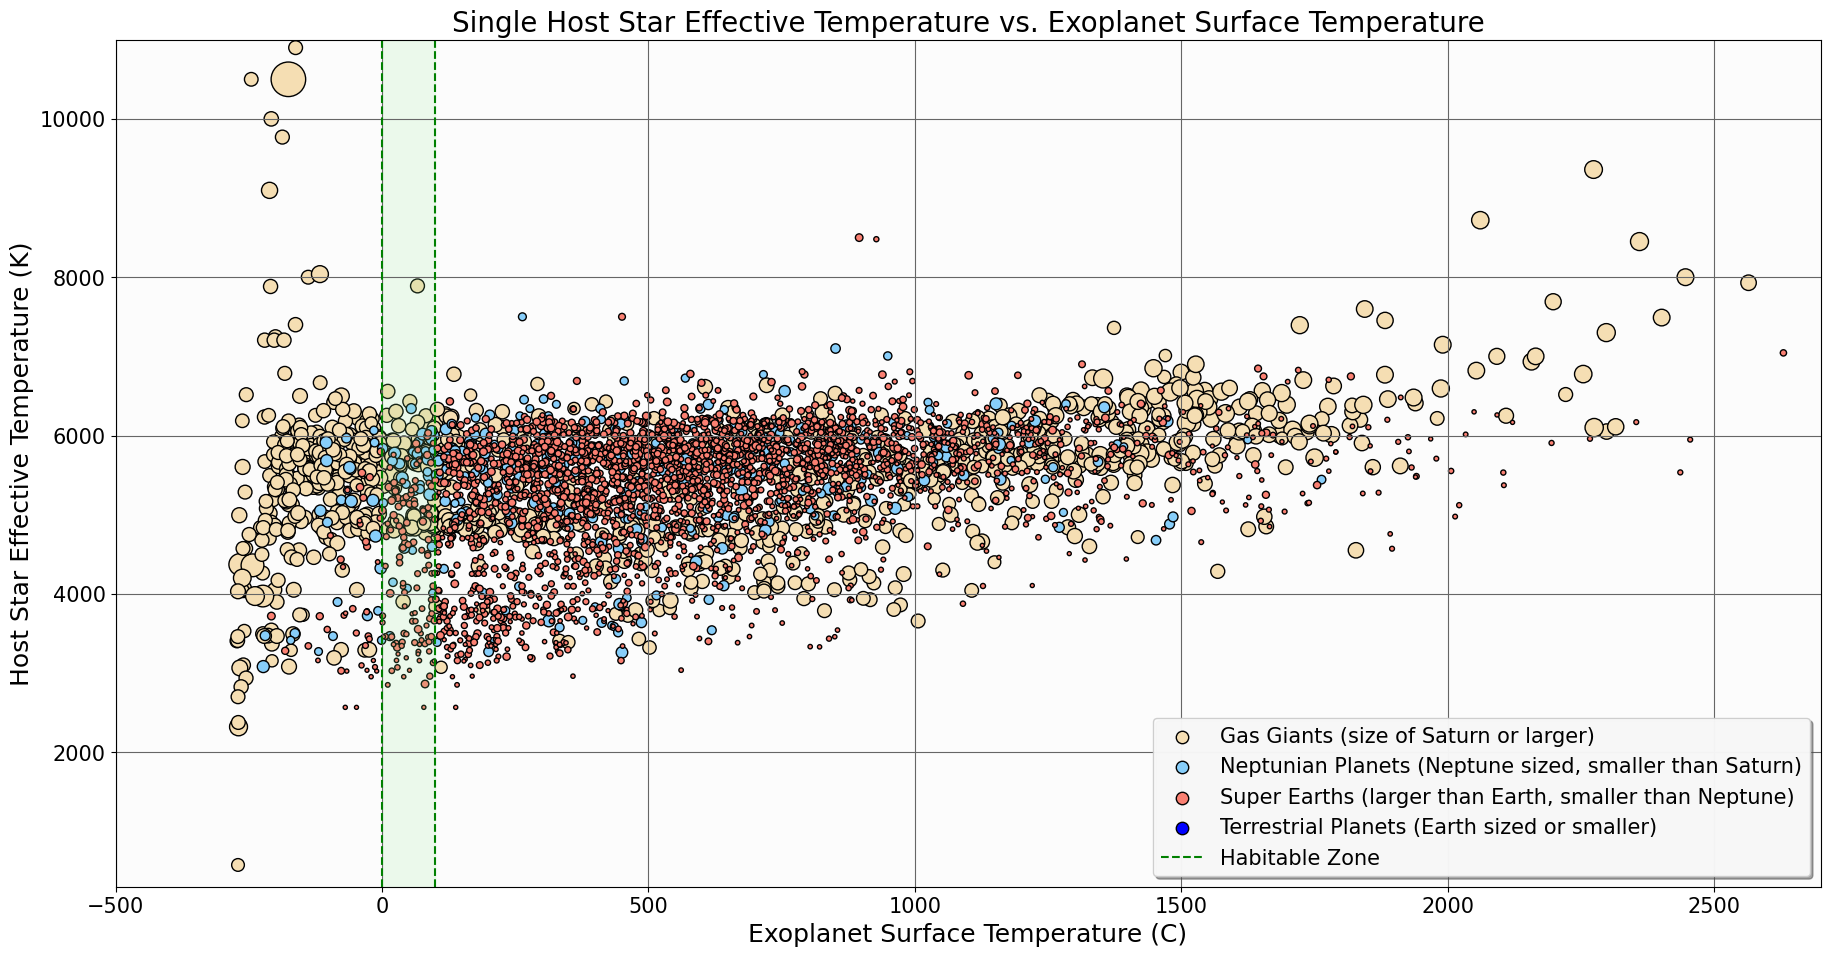

In [96]:
fig = plt.figure(figsize=(22,11))
ax = fig.add_subplot(111, facecolor='0.99')

ax.set_xlim(-500, 2700)
ax.set_ylim(300, 11000)
ax.grid(color='0.4')
ax.set_title('Single Host Star Effective Temperature vs. Exoplanet Surface Temperature')
ax.title.set_fontsize(20)
ax.set_xlabel('Exoplanet Surface Temperature (C)')
ax.xaxis.label.set_fontsize(18)
ax.set_ylabel('Host Star Effective Temperature (K)')
ax.yaxis.label.set_fontsize(18)

plot_exoplanets_with_size(ax=ax,
                          exoplanets_data=st_teff_vs_pl_tsurf_plot_data,
                          x_field='pl_tsurf_c',
                          y_field='st_teff',
                          size_field='pl_rade',
                          type_field='pl_type',
                          hz_status_field='pl_hz_status',
                          scale_size=8,
                          edgecolors='black',
                          exoplanet_color_map=exoplanet_type_colors,
                          exoplanet_label_map=exoplanet_type_labels)

plt.vlines(x=0, ymin=300, ymax=11000, colors='green', linestyles='dashed', label='Habitable Zone')
plt.vlines(x=100, ymin=300, ymax=11000, colors='green', linestyles='dashed')

ax.add_patch(plt.Rectangle(xy=(0, 0),
                           width=100,
                           height=11000,
                           color='lightgreen',
                           alpha=0.15))

ax.tick_params(axis='both', labelsize=15)

legend = ax.legend(scatterpoints=1,
                   labelcolor='black',
                   loc='best',
                   fontsize=15,
                   markerscale=2,
                   shadow=True,
                   framealpha=0.95)
set_legend_size(legend, len(exoplanet_type_labels), 80)

frame = legend.get_frame()
frame.set_facecolor('0.99')

In [97]:
st_teff_vs_pl_eqt_plot_data = exoplanets_data.loc[(~np.isnan(exoplanets_data['sy_snum'])) & (exoplanets_data['sy_snum'] == 1)
                                                  & (~np.isnan(exoplanets_data['st_teff']))
                                                  & (~np.isnan(exoplanets_data['pl_eqt']))
                                                  & (~np.isnan(exoplanets_data['pl_rade']))
                                                  & (exoplanets_data['pl_type'] != 'N/A')
                                                  & (exoplanets_data['pl_hz_status'] != 'N/A')]

In [98]:
st_teff_vs_pl_eqt_plot_data.describe()

sy_snum      sy_pnum    disc_year  pl_controv_flag     pl_orbper  \
count   3725.0  3725.000000  3725.000000      3725.000000  3.702000e+03   
mean       1.0     1.794094  2016.508456         0.002416  1.128635e+05   
std        0.0     1.163243     3.390333         0.049101  6.609394e+06   
min        1.0     1.000000  1997.000000         0.000000  1.797190e-01   
25%        1.0     1.000000  2014.000000         0.000000  4.101822e+00   
50%        1.0     1.000000  2016.000000         0.000000  9.112331e+00   
75%        1.0     2.000000  2019.000000         0.000000  2.141272e+01   
max        1.0     8.000000  2024.000000         1.000000  4.020000e+08   

       pl_orbpererr1  pl_orbpererr2  pl_orbperlim   pl_orbsmax  \
count   3.246000e+03   3.246000e+03   3702.000000  3725.000000   
mean    1.460650e+05  -3.207815e+04     -0.000810     6.161731   
std     8.249654e+06   1.756362e+06      0.028459   151.508247   
min     0.000000e+00  -1.000000e+08     -1.000000     0.005800   
25%     9.622500e-06  -2.100000e-04      0.000000     0.049100   
50%     4.300000e-05  -4.300000e-05      0.000000     0.082000   
75%     2.100000e-04  -9.560000e-06      0.000000     0.152800   
max     4.700000e+08   0.000000e+00      0.000000  7506.000000   

       pl_orbsmaxerr1  ...  sy_vmagerr2      sy_kmag  sy_kmagerr1  \
count     1256.000000  ...  3714.000000  3721.000000  3697.000000   
mean         4.500094  ...    -0.117962    11.723781     0.032610   
std        146.991756  ...     0.128767     2.012672     0.165235   
min          0.000000  ...    -1.133000     2.636000     0.011000   
25%          0.000600  ...    -0.137000    10.813000     0.020000   
50%          0.001100  ...    -0.092000    12.289000     0.024000   
75%          0.003000  ...    -0.057000    13.195000     0.034000   
max       5205.000000  ...    -0.002000    15.271000     9.995000   

       sy_kmagerr2   sy_gaiamag  sy_gaiamagerr1  sy_gaiamagerr2  \
count  3692.000000  3701.000000     3701.000000     3701.000000   
mean     -0.032628    13.556605        0.000504       -0.000504   
std       0.165346     2.047274        0.000828        0.000828   
min      -9.995000     3.820150        0.000118       -0.017417   
25%      -0.034000    12.536000        0.000258       -0.000513   
50%      -0.024000    14.077000        0.000360       -0.000360   
75%      -0.020000    15.065500        0.000513       -0.000258   
max      -0.011000    19.879000        0.017417       -0.000118   

       raw_data_calc_orb_sma   pl_tsurf_k   pl_tsurf_c  
count            3725.000000  3725.000000  3725.000000  
mean                2.345657   963.886433   690.736433  
std               125.466691   462.753892   462.753892  
min                 0.000000     1.221287  -271.928713  
25%                 0.048770   621.048247   347.898247  
50%                 0.081227   887.637942   614.487942  
75%                 0.147513  1233.072007   959.922007  
max              7652.883408  3169.563245  2896.413245  

[8 rows x 78 columns]

In [99]:
st_teff_vs_pl_eqt_plot_data['pl_hz_status'].value_counts()

pl_hz_status
Too Hot     3503
In HZ        132
Too Cold      90
Name: count, dtype: int64

In [100]:
st_teff_vs_pl_eqt_plot_data.loc[(st_teff_vs_pl_eqt_plot_data['pl_hz_status'] == 'In HZ'), 'pl_type'] = 'HabitableZone-Planets'

In [101]:
st_teff_vs_pl_eqt_plot_data['pl_type'].value_counts()

pl_type
Super-Earths             2575
Gas-Giants                563
Neptunian-Planets         284
Terrestrial-Panets        171
HabitableZone-Planets     132
Name: count, dtype: int64

In [102]:
st_teff_vs_pl_eqt_plot_data['st_teff'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

count     3725.000000
mean      5419.444279
std        807.544197
min        575.000000
25%       5076.000000
50%       5609.000000
75%       5931.000000
90%       6176.600000
95%       6340.800000
99%       6824.560000
99.5%     7396.280000
99.9%     8824.052000
max      10900.000000
Name: st_teff, dtype: float64

In [103]:
st_teff_vs_pl_eqt_plot_data['pl_eqt'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

count    3725.000000
mean      899.014497
std       443.773347
min        96.000000
25%       568.000000
50%       811.000000
75%      1134.000000
90%      1531.600000
95%      1740.800000
99%      2211.520000
99.5%    2465.660000
99.9%    2732.760000
max      3646.000000
Name: pl_eqt, dtype: float64

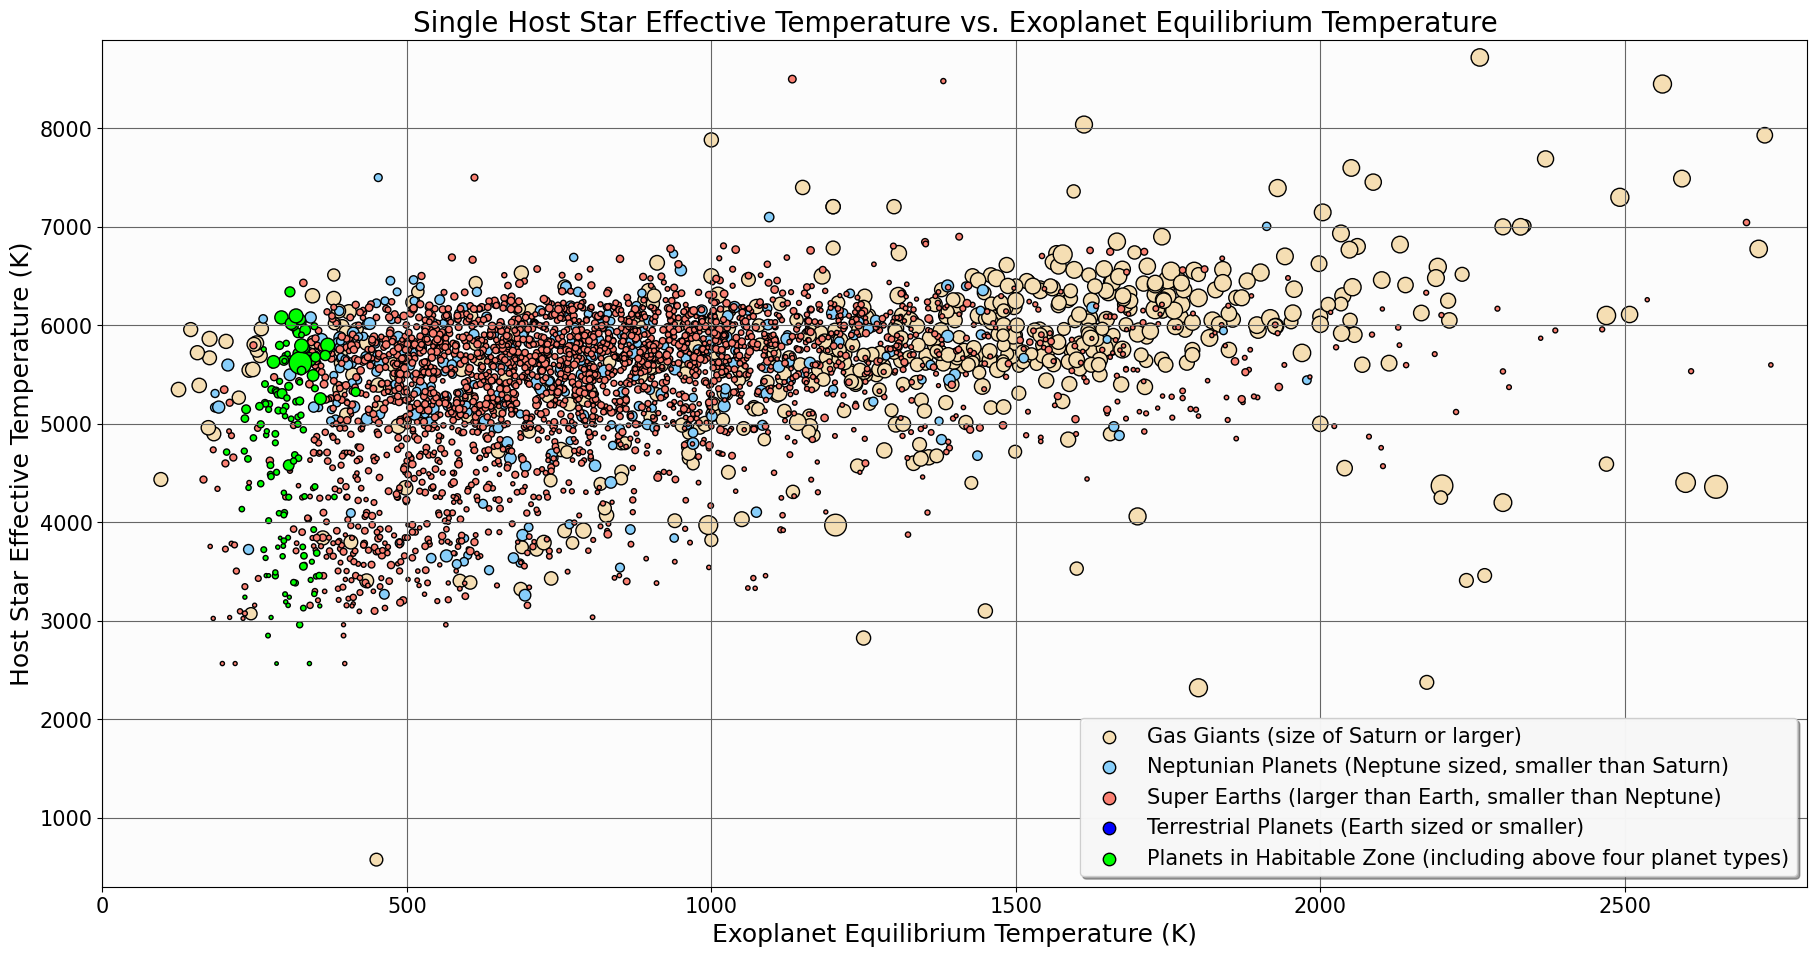

In [105]:
fig = plt.figure(figsize=(22,11))
ax = fig.add_subplot(111, facecolor='0.99')

ax.set_xlim(0, 2800)
ax.set_ylim(300, 8900)
ax.grid(color='0.4')
ax.set_title('Single Host Star Effective Temperature vs. Exoplanet Equilibrium Temperature')
ax.title.set_fontsize(20)
ax.set_xlabel('Exoplanet Equilibrium Temperature (K)')
ax.xaxis.label.set_fontsize(18)
ax.set_ylabel('Host Star Effective Temperature (K)')
ax.yaxis.label.set_fontsize(18)

plot_exoplanets_with_size(ax=ax,
                          exoplanets_data=st_teff_vs_pl_eqt_plot_data,
                          x_field='pl_eqt',
                          y_field='st_teff',
                          size_field='pl_rade',
                          type_field='pl_type',
                          hz_status_field='pl_hz_status',
                          scale_size=8,
                          edgecolors='black',
                          exoplanet_color_map=exoplanet_type_with_hz_colors,
                          exoplanet_label_map=exoplanet_type_with_hz_labels)

ax.tick_params(axis='both', labelsize=15)

legend = ax.legend(scatterpoints=1,
                   labelcolor='black',
                   loc='best',
                   fontsize=15,
                   markerscale=2,
                   shadow=True,
                   framealpha=0.95)
set_legend_size(legend, len(exoplanet_type_with_hz_labels), 80)

frame = legend.get_frame()
frame.set_facecolor('0.99')

In [106]:
st_teff_vs_pl_insol_plot_data = exoplanets_data.loc[(~np.isnan(exoplanets_data['sy_snum'])) & (exoplanets_data['sy_snum'] == 1)
                                                  & (~np.isnan(exoplanets_data['st_teff']))
                                                  & (~np.isnan(exoplanets_data['pl_insol'])) & (exoplanets_data['pl_insol'] != 0)
                                                  & (~np.isnan(exoplanets_data['pl_rade']))
                                                  & (exoplanets_data['pl_type'] != 'N/A')
                                                  & (exoplanets_data['pl_hz_status'] != 'N/A')]

In [107]:
st_teff_vs_pl_insol_plot_data.describe()

sy_snum      sy_pnum    disc_year  pl_controv_flag    pl_orbper  \
count   3563.0  3563.000000  3563.000000      3563.000000  3563.000000   
mean       1.0     1.802694  2016.580129         0.001965    33.582578   
std        0.0     1.155789     3.193281         0.044287   173.669402   
min        1.0     1.000000  1997.000000         0.000000     0.280324   
25%        1.0     1.000000  2014.000000         0.000000     4.143236   
50%        1.0     1.000000  2016.000000         0.000000     9.181860   
75%        1.0     2.000000  2019.000000         0.000000    21.782480   
max        1.0     8.000000  2024.000000         1.000000  5138.000000   

       pl_orbpererr1  pl_orbpererr2  pl_orbperlim   pl_orbsmax  \
count    3118.000000    3118.000000   3563.000000  3563.000000   
mean        1.234434      -0.803135     -0.000281     0.142579   
std        36.217737      22.644634      0.016753     0.263630   
min         0.000000   -1130.000000     -1.000000     0.006000   
25%         0.000009      -0.000200      0.000000     0.049200   
50%         0.000042      -0.000042      0.000000     0.081800   
75%         0.000200      -0.000009      0.000000     0.149950   
max      1500.000000       0.000000      0.000000     6.150000   

       pl_orbsmaxerr1  ...  sy_vmagerr2      sy_kmag  sy_kmagerr1  \
count     1113.000000  ...  3557.000000  3561.000000  3538.000000   
mean         0.007715  ...    -0.118653    11.816002     0.032270   
std          0.054030  ...     0.124679     1.913941     0.168435   
min          0.000000  ...    -1.133000     3.261000     0.011000   
25%          0.000600  ...    -0.138000    10.962000     0.020000   
50%          0.001100  ...    -0.092000    12.344000     0.024000   
75%          0.002800  ...    -0.057000    13.214000     0.034000   
max          1.300000  ...    -0.002000    14.561000     9.995000   

       sy_kmagerr2   sy_gaiamag  sy_gaiamagerr1  sy_gaiamagerr2  \
count  3531.000000  3539.000000     3538.000000     3538.000000   
mean     -0.032298    13.656580        0.000482       -0.000482   
std       0.168601     1.905982        0.000787        0.000787   
min      -9.995000     5.240200        0.000118       -0.017417   
25%      -0.034000    12.677550        0.000257       -0.000506   
50%      -0.024000    14.123700        0.000358       -0.000358   
75%      -0.020000    15.073550        0.000506       -0.000257   
max      -0.011000    19.879000        0.017417       -0.000118   

       raw_data_calc_orb_sma   pl_tsurf_k   pl_tsurf_c  
count            3563.000000  3563.000000  3563.000000  
mean                0.143004   963.682494   690.532494  
std                 0.264117   453.104624   453.104624  
min                 0.005850    96.970074  -176.179926  
25%                 0.049425   624.716147   351.566147  
50%                 0.081929   884.347400   611.197400  
75%                 0.149100  1223.058731   949.908731  
max                 6.122882  3169.563245  2896.413245  

[8 rows x 78 columns]

In [108]:
st_teff_vs_pl_insol_plot_data['pl_hz_status'].value_counts()

pl_hz_status
Too Hot     3373
In HZ        131
Too Cold      59
Name: count, dtype: int64

In [109]:
st_teff_vs_pl_insol_plot_data.loc[(st_teff_vs_pl_insol_plot_data['pl_hz_status'] == 'In HZ'), 'pl_type'] = 'HabitableZone-Planets'

In [110]:
st_teff_vs_pl_insol_plot_data['pl_type'].value_counts()

pl_type
Super-Earths             2523
Gas-Giants                469
Neptunian-Planets         270
Terrestrial-Panets        170
HabitableZone-Planets     131
Name: count, dtype: int64

In [111]:
st_teff_vs_pl_insol_plot_data['st_teff'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

count    3563.000000
mean     5409.028223
std       790.139625
min      2566.000000
25%      5069.500000
50%      5609.000000
75%      5924.500000
90%      6170.000000
95%      6326.900000
99%      6769.760000
99.5%    7016.460000
99.9%    8463.140000
max      9360.000000
Name: st_teff, dtype: float64

In [112]:
st_teff_vs_pl_insol_plot_data['pl_insol_log'] = np.log10(st_teff_vs_pl_insol_plot_data['pl_insol'])
st_teff_vs_pl_insol_plot_data['pl_insol_log'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

count    3563.000000
mean        1.918181
std         0.860688
min        -2.000000
25%         1.375203
50%         1.968810
75%         2.532357
90%         2.971131
95%         3.212939
99%         3.613880
99.5%       3.725904
99.9%       3.998430
max         4.233580
Name: pl_insol_log, dtype: float64

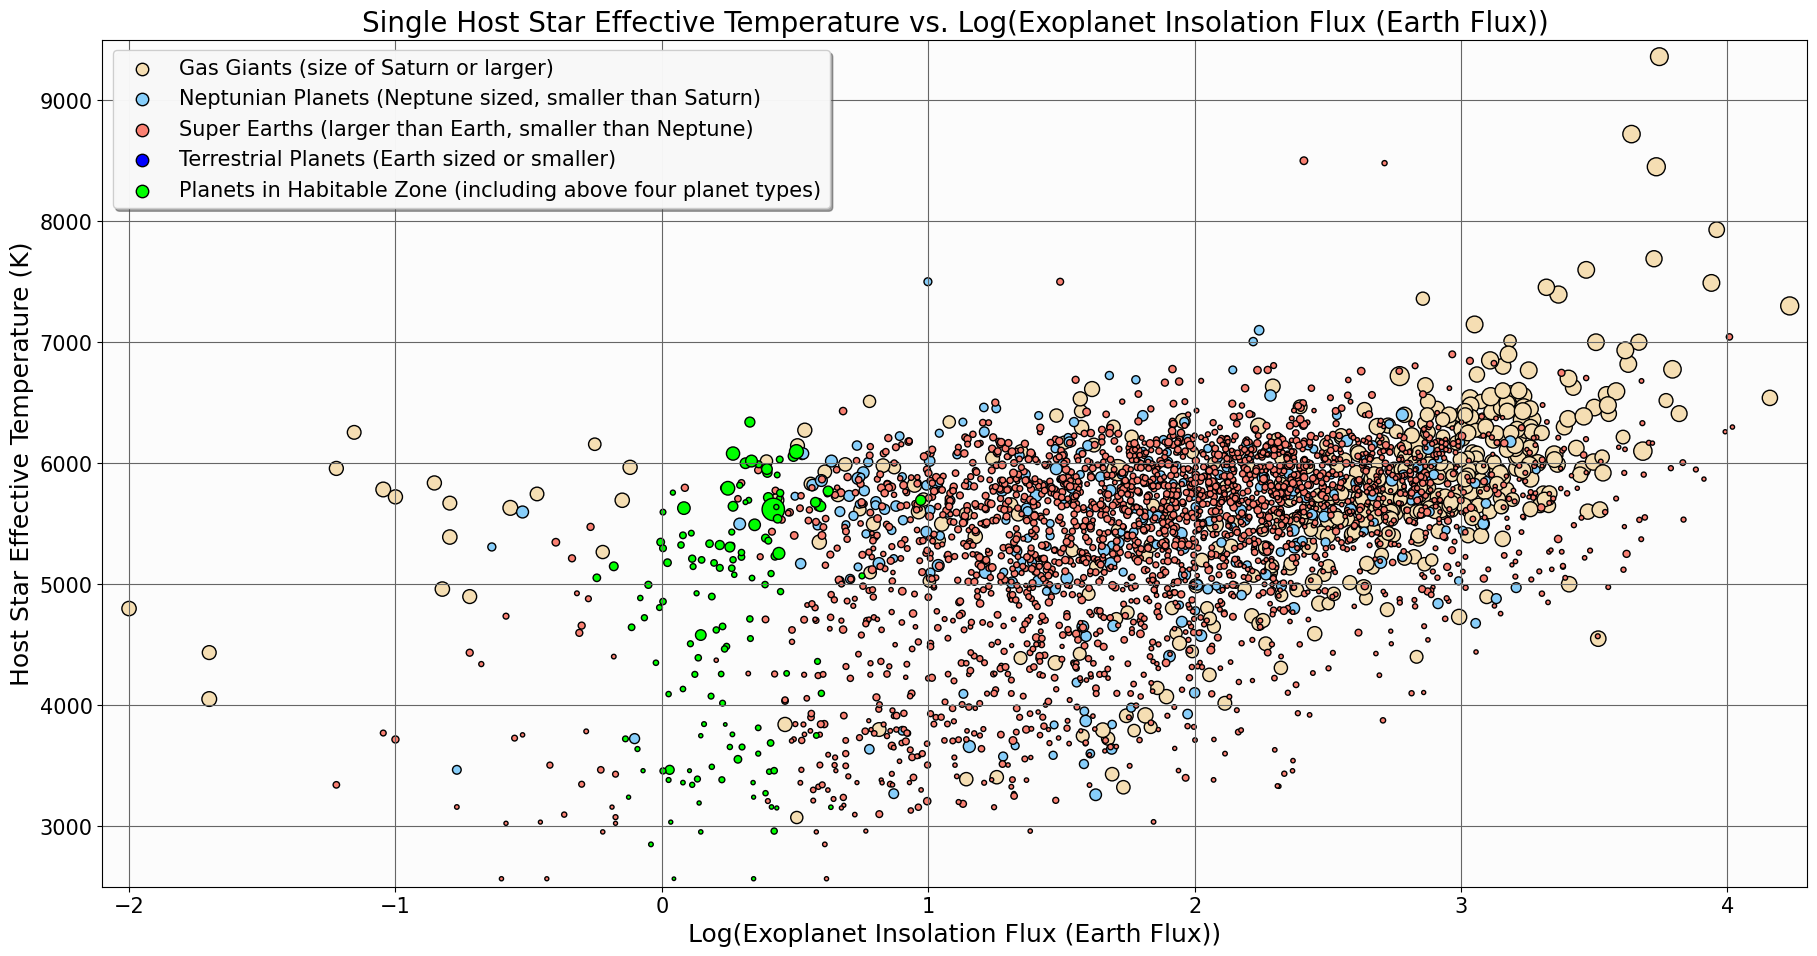

In [113]:
fig = plt.figure(figsize=(22,11))
ax = fig.add_subplot(111, facecolor='0.99')

ax.set_xlim(-2.1, 4.3)
ax.set_ylim(2500, 9500)
ax.grid(color='0.4')
ax.set_title('Single Host Star Effective Temperature vs. Log(Exoplanet Insolation Flux (Earth Flux))')
ax.title.set_fontsize(20)
ax.set_xlabel('Log(Exoplanet Insolation Flux (Earth Flux))')
ax.xaxis.label.set_fontsize(18)
ax.set_ylabel('Host Star Effective Temperature (K)')
ax.yaxis.label.set_fontsize(18)

plot_exoplanets_with_size(ax=ax,
                          exoplanets_data=st_teff_vs_pl_insol_plot_data,
                          x_field='pl_insol_log',
                          y_field='st_teff',
                          size_field='pl_rade',
                          type_field='pl_type',
                          hz_status_field='pl_hz_status',
                          scale_size=8,
                          edgecolors='black',
                          exoplanet_color_map=exoplanet_type_with_hz_colors,
                          exoplanet_label_map=exoplanet_type_with_hz_labels)

ax.tick_params(axis='both', labelsize=15)

legend = ax.legend(scatterpoints=1,
                   labelcolor='black',
                   loc='best',
                   fontsize=15,
                   markerscale=2,
                   shadow=True,
                   framealpha=0.96)
set_legend_size(legend, len(exoplanet_type_with_hz_labels), 80)

frame = legend.get_frame()
frame.set_facecolor('0.99')

In [114]:
st_teff_vs_pl_orb_plot_data = exoplanets_data.loc[(~np.isnan(exoplanets_data['sy_snum'])) & (exoplanets_data['sy_snum'] == 1)
                                                  & (~np.isnan(exoplanets_data['st_teff']))
                                                  & (~np.isnan(exoplanets_data['pl_orbsmax']))
                                                  & (~np.isnan(exoplanets_data['pl_rade']))
                                                  & (exoplanets_data['pl_type'] != 'N/A')
                                                  & (exoplanets_data['pl_hz_status'] != 'N/A')]

In [115]:
st_teff_vs_pl_orb_plot_data.describe()

sy_snum      sy_pnum    disc_year  pl_controv_flag     pl_orbper  \
count   4583.0  4583.000000  4583.000000      4583.000000  4.546000e+03   
mean       1.0     1.785730  2016.118045         0.003491  9.229321e+04   
std        0.0     1.143328     4.216147         0.058989  5.964384e+06   
min        1.0     1.000000  1995.000000         0.000000  1.797190e-01   
25%        1.0     1.000000  2014.000000         0.000000  4.584019e+00   
50%        1.0     1.000000  2016.000000         0.000000  1.156680e+01   
75%        1.0     2.000000  2019.000000         0.000000  3.966839e+01   
max        1.0     8.000000  2024.000000         1.000000  4.020000e+08   

       pl_orbpererr1  pl_orbpererr2  pl_orbperlim   pl_orbsmax  \
count   4.089000e+03   4.089000e+03   4546.000000  4583.000000   
mean    1.160541e+05  -2.552493e+04     -0.000660     6.054159   
std     7.350241e+06   1.564879e+06      0.025683   137.630308   
min     0.000000e+00  -1.000000e+08     -1.000000     0.005800   
25%     1.448000e-05  -1.110000e-03      0.000000     0.052505   
50%     8.643000e-05  -8.773000e-05      0.000000     0.097400   
75%     1.100000e-03  -1.477000e-05      0.000000     0.228050   
max     4.700000e+08   0.000000e+00      0.000000  7506.000000   

       pl_orbsmaxerr1  ...  sy_vmagerr2      sy_kmag  sy_kmagerr1  \
count     2065.000000  ...  4569.000000  4577.000000  4551.000000   
mean         2.946554  ...    -0.104117    10.725806     0.040272   
std        114.671878  ...     0.121310     2.961941     0.249935   
min          0.000000  ...    -1.133000    -1.846000     0.011000   
25%          0.000800  ...    -0.126000     8.995000     0.020000   
50%          0.002000  ...    -0.080000    11.803000     0.024000   
75%          0.017800  ...    -0.030000    13.005000     0.033000   
max       5205.000000  ...    -0.001000    15.495000     9.995000   

       sy_kmagerr2   sy_gaiamag  sy_gaiamagerr1  sy_gaiamagerr2  \
count  4542.000000  4550.000000     4549.000000     4549.000000   
mean     -0.040315    12.593375        0.000567       -0.000567   
std       0.250181     2.955349        0.001003        0.001003   
min      -9.995000     2.364310        0.000118       -0.017417   
25%      -0.033000    10.978200        0.000257       -0.000527   
50%      -0.024000    13.566300        0.000360       -0.000360   
75%      -0.020000    14.900500        0.000527       -0.000257   
max      -0.011000    19.879000        0.017417       -0.000118   

       raw_data_calc_orb_sma   pl_tsurf_k   pl_tsurf_c  
count            4583.000000  4583.000000  4583.000000  
mean                2.313046   880.224220   607.074220  
std               113.122908   504.530200   504.530200  
min                 0.000000     1.221287  -271.928713  
25%                 0.051673   523.458780   250.308780  
50%                 0.095143   817.087292   543.937292  
75%                 0.218941  1155.291619   882.141619  
max              7652.883408  7964.054956  7690.904956  

[8 rows x 78 columns]

In [116]:
st_teff_vs_pl_orb_plot_data['pl_hz_status'].value_counts()

pl_hz_status
Too Hot     3953
Too Cold     403
In HZ        227
Name: count, dtype: int64

In [117]:
st_teff_vs_pl_orb_plot_data.loc[(st_teff_vs_pl_orb_plot_data['pl_hz_status'] == 'In HZ'), 'pl_type'] = 'HabitableZone-Planets'

In [118]:
st_teff_vs_pl_orb_plot_data['pl_type'].value_counts()

pl_type
Super-Earths             2744
Gas-Giants               1080
Neptunian-Planets         353
HabitableZone-Planets     227
Terrestrial-Panets        179
Name: count, dtype: int64

In [120]:
st_teff_vs_pl_orb_plot_data['st_teff'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

count     4583.000000
mean      5379.640956
std       1046.029670
min        575.000000
25%       4954.000000
50%       5564.000000
75%       5900.000000
90%       6166.800000
95%       6325.900000
99%       6846.720000
99.5%     7508.820000
99.9%    10667.200000
max      29300.000000
Name: st_teff, dtype: float64

In [121]:
st_teff_vs_pl_orb_plot_data['pl_orbsmax'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

count    4583.000000
mean        6.054159
std       137.630308
min         0.005800
25%         0.052505
50%         0.097400
75%         0.228050
90%         1.170000
95%         2.799400
99%        20.044460
99.5%     119.080000
99.9%    1144.602000
max      7506.000000
Name: pl_orbsmax, dtype: float64

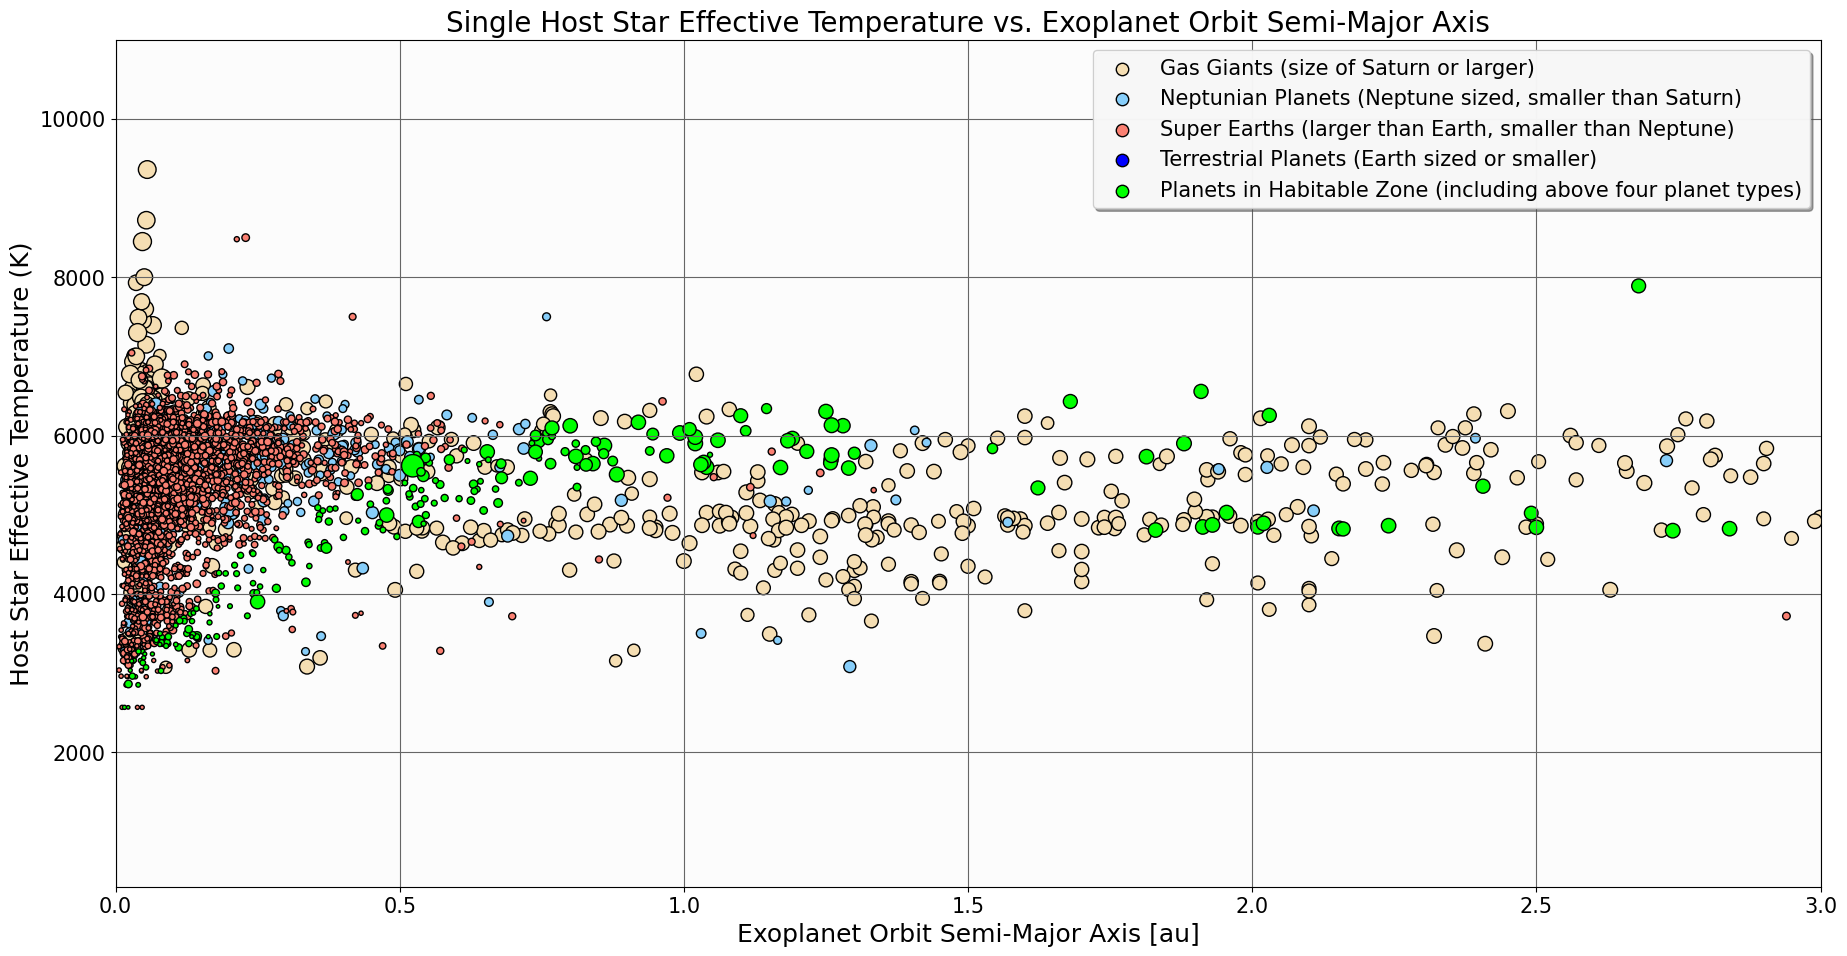

In [122]:
fig = plt.figure(figsize=(22,11))
ax = fig.add_subplot(111, facecolor='0.99')

ax.set_xlim(0, 3)
ax.set_ylim(300, 11000)
ax.grid(color='0.4')
ax.set_title('Single Host Star Effective Temperature vs. Exoplanet Orbit Semi-Major Axis')
ax.title.set_fontsize(20)
ax.set_xlabel('Exoplanet Orbit Semi-Major Axis [au]')
ax.xaxis.label.set_fontsize(18)
ax.set_ylabel('Host Star Effective Temperature (K)')
ax.yaxis.label.set_fontsize(18)

plot_exoplanets_with_size(ax=ax,
                          exoplanets_data=st_teff_vs_pl_orb_plot_data,
                          x_field='pl_orbsmax',
                          y_field='st_teff',
                          size_field='pl_rade',
                          type_field='pl_type',
                          hz_status_field='pl_hz_status',
                          scale_size=8,
                          edgecolors='black',
                          exoplanet_color_map=exoplanet_type_with_hz_colors,
                          exoplanet_label_map=exoplanet_type_with_hz_labels)

ax.tick_params(axis='both', labelsize=15)

legend = ax.legend(scatterpoints=1,
                   labelcolor='black',
                   loc='best',
                   fontsize=15,
                   markerscale=2,
                   shadow=True,
                   framealpha=0.95)
set_legend_size(legend, len(exoplanet_type_with_hz_labels), 80)

frame = legend.get_frame()
frame.set_facecolor('0.99')

In [53]:
exoplanet_host_star_ages_filename = '/content/drive/My Drive/Colab Notebooks/HZExoplanetExploration/PlanetarySystemsCompositeData/PSCompPars_2024.07.16.csv'
exoplanet_host_star_ages_data = pd.read_table(exoplanet_host_star_ages_filename,
                                              skiprows=9,
                                              sep=',',
                                              header=None,
                                              index_col=None,
                                              names = ['pl_name', 'st_age'],
                                              skipfooter=0,
                                              engine='python')

In [54]:
exoplanet_host_star_ages_data.head()

pl_name  st_age
0    11 Com b     NaN
1    11 UMi b    1.56
2    14 And b    4.50
3    14 Her b    3.90
4  16 Cyg B b    7.40

In [55]:
exoplanet_host_star_ages_data.tail()

pl_name  st_age
5685  ups And b     5.0
5686  ups And c     5.0
5687  ups And d     5.0
5688  ups Leo b     NaN
5689   xi Aql b     7.1

In [56]:
exoplanet_host_star_ages_data.describe()

st_age
count  4443.000000
mean      4.377490
std       3.092901
min       0.000000
25%       2.340000
50%       3.980000
75%       5.400000
max      14.900000

In [57]:
# Cast values to corresponding data types
exoplanet_host_star_ages_data['pl_name'] = exoplanet_host_star_ages_data['pl_name'].astype(str)
pd.to_numeric(exoplanet_host_star_ages_data['st_age'], errors = "coerce")

0        NaN
1       1.56
2       4.50
3       3.90
4       7.40
        ... 
5685    5.00
5686    5.00
5687    5.00
5688     NaN
5689    7.10
Name: st_age, Length: 5690, dtype: float64

In [58]:
exoplanet_host_star_ages_data = exoplanet_host_star_ages_data.applymap(lambda x: np.nan if isinstance(x, str) and x.isspace() else x)

In [59]:
exoplanets_data_with_host_star_ages = pd.merge(exoplanets_data, exoplanet_host_star_ages_data, on="pl_name")

In [60]:
exoplanets_data_with_host_star_ages.describe()

sy_snum      sy_pnum    disc_year  pl_controv_flag     pl_orbper  \
count  5582.000000  5582.000000  5582.000000      5582.000000  5.334000e+03   
mean      1.102472     1.781799  2016.180222         0.005195  8.018026e+04   
std       0.342160     1.160806     4.527855         0.071897  5.506837e+06   
min       1.000000     1.000000  1992.000000         0.000000  9.070629e-02   
25%       1.000000     1.000000  2014.000000         0.000000  4.463672e+00   
50%       1.000000     1.000000  2016.000000         0.000000  1.155834e+01   
75%       1.000000     2.000000  2020.000000         0.000000  4.150555e+01   
max       4.000000     8.000000  2024.000000         1.000000  4.020000e+08   

       pl_orbpererr1  pl_orbpererr2  pl_orbperlim   pl_orbsmax  \
count   4.855000e+03   4.855000e+03   5334.000000  5288.000000   
mean    9.857131e+04  -2.251085e+04     -0.000750     6.657748   
std     6.745660e+06   1.437317e+06      0.038724   134.408325   
min     0.000000e+00  -1.000000e+08     -1.000000     0.004400   
25%     1.500000e-05  -1.672500e-03      0.000000     0.053200   
50%     1.000000e-04  -1.000000e-04      0.000000     0.103450   
75%     1.661000e-03  -1.500000e-05      0.000000     0.301000   
max     4.700000e+08   0.000000e+00      1.000000  7506.000000   

       pl_orbsmaxerr1  ...      sy_kmag  sy_kmagerr1  sy_kmagerr2  \
count     2689.000000  ...  5368.000000  5332.000000  5320.000000   
mean         2.399518  ...    10.506263     0.043211    -0.043235   
std        100.513338  ...     3.043125     0.264873     0.271077   
min          0.000000  ...    -3.044000     0.011000    -9.995000   
25%          0.000830  ...     8.559500     0.020000    -0.031000   
50%          0.002900  ...    11.431000     0.023000    -0.023000   
75%          0.039000  ...    12.848250     0.031000    -0.020000   
max       5205.000000  ...    33.110000     9.995000    -0.011000   

        sy_gaiamag  sy_gaiamagerr1  sy_gaiamagerr2  raw_data_calc_orb_sma  \
count  5313.000000     5311.000000     5311.000000            5582.000000   
mean     12.353631        0.000645       -0.000645               2.140591   
std       3.002142        0.001844        0.001844             102.786989   
min       2.364310        0.000118       -0.063232               0.000000   
25%      10.545900        0.000257       -0.000537               0.048335   
50%      13.234000        0.000364       -0.000364               0.090349   
75%      14.770000        0.000537       -0.000257               0.216221   
max      20.186100        0.063232       -0.000118            7652.883408   

        pl_tsurf_k   pl_tsurf_c       st_age  
count  5050.000000  5050.000000  4384.000000  
mean    879.580165   606.430165     4.376396  
std     517.711580   517.711580     3.085732  
min       1.221287  -271.928713     0.000000  
25%     508.442935   235.292935     2.340000  
50%     811.675000   538.525000     3.980000  
75%    1163.091472   889.941472     5.400000  
max    7964.054956  7690.904956    14.900000  

[8 rows x 79 columns]

pl_type
N/A                     19
Terrestrial-Panets     214
Neptunian-Planets      506
Gas-Giants            1591
Super-Earths          3252
Name: count, dtype: int64

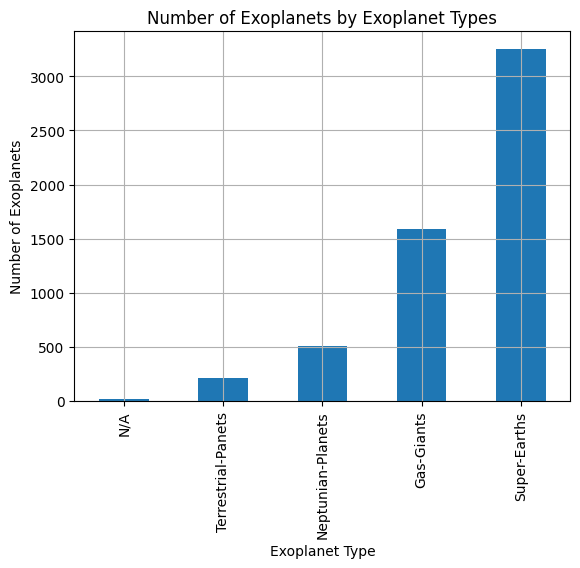

In [61]:
# Plot the graph for the number of exoplanets by exoplanet classes
exoplanet_types = exoplanets_data_with_host_star_ages['pl_type'].map(lambda x: x)
exoplanet_types.value_counts().sort_values().plot(kind='bar',
                                                  xlabel='Exoplanet Type',
                                                  ylabel='Number of Exoplanets',
                                                  title='Number of Exoplanets by Exoplanet Types',
                                                  grid=True)
exoplanet_types.value_counts().sort_values()

st_spectype
B     10
A     21
F    250
M    440
K    572
G    716
Name: count, dtype: int64

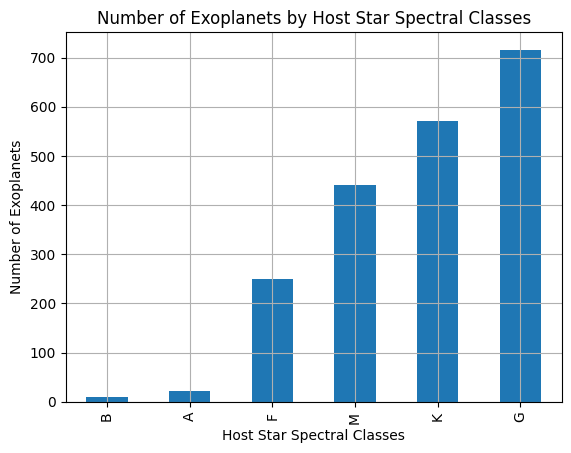

In [62]:
# Keep the stellar hosts with OBAFGKM spectral classes
exoplanets_with_spectypes = exoplanets_data_with_host_star_ages[exoplanets_data_with_host_star_ages['st_spectype'].map(lambda x: x[0].upper() in 'OBAFGKM')]

# Plot the graph for the number of stellar hosts by spectral classes
stellar_host_spectral_classes = exoplanets_with_spectypes['st_spectype'].map(lambda x: x[0].upper())
stellar_host_spectral_classes.value_counts().sort_values().plot(kind='bar',
                                                                xlabel='Host Star Spectral Classes',
                                                                ylabel='Number of Exoplanets',
                                                                title='Number of Exoplanets by Host Star Spectral Classes',
                                                                grid=True)
stellar_host_spectral_classes.value_counts().sort_values()

In [63]:
exoplanets_data_with_host_star_ages['st_age'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

count    4384.000000
mean        4.376396
std         3.085732
min         0.000000
25%         2.340000
50%         3.980000
75%         5.400000
90%         8.500000
95%        11.000000
99%        13.900000
99.5%      14.000000
99.9%      14.000000
max        14.900000
Name: st_age, dtype: float64

st_age
(0, 1]      556
(1, 2]      385
(2, 3]      551
(3, 4]      755
(4, 5]      916
(5, 6]      294
(6, 7]      228
(7, 8]      196
(8, 9]      129
(9, 10]      84
(10, 11]     73
(11, 12]     39
(12, 13]     46
(13, 14]    129
(14, 15]      2
Name: count, dtype: int64

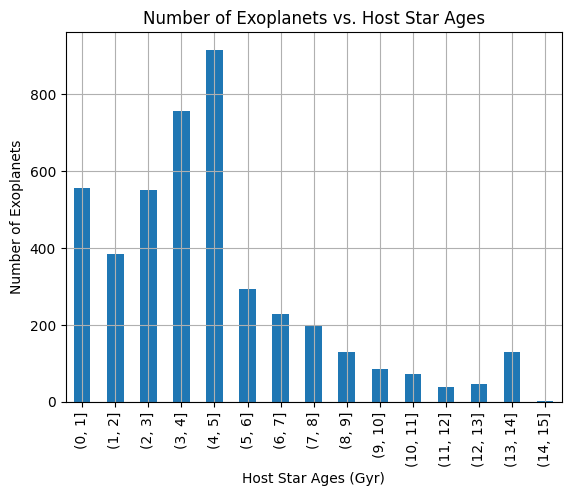

In [68]:
host_star_age_buckets = create_buckets(0, 15, 1)
host_star_ages_dist = pd.cut(exoplanets_data_with_host_star_ages['st_age'], bins=host_star_age_buckets)
host_star_ages_dist.value_counts().sort_index().plot(kind='bar',
                                                     xlabel='Host Star Ages (Gyr)',
                                                     ylabel='Number of Exoplanets',
                                                     title='Number of Exoplanets vs. Host Star Ages',
                                                     grid=True)
host_star_ages_dist.value_counts().sort_index()

st_age
(0, 1]      23
(1, 2]      18
(2, 3]      25
(3, 4]      32
(4, 5]      42
(5, 6]      12
(6, 7]      13
(7, 8]      10
(8, 9]       8
(9, 10]      2
(10, 11]     3
(11, 12]     0
(12, 13]     3
(13, 14]     4
(14, 15]     0
Name: count, dtype: int64

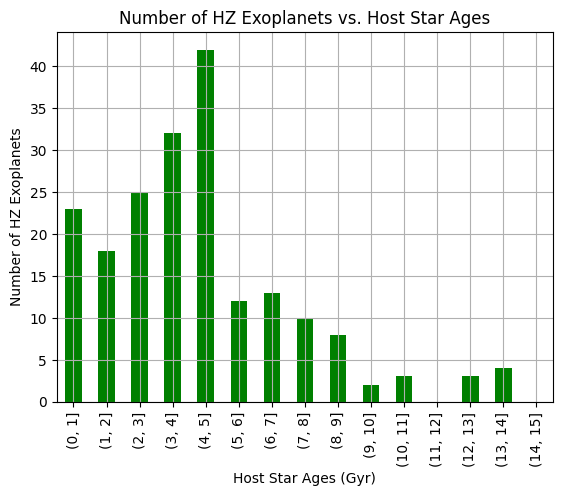

In [65]:
hz_exoplanets_data = exoplanets_data_with_host_star_ages.loc[(exoplanets_data_with_host_star_ages['pl_hz_status'] == 'In HZ')]
hz_host_star_ages_dist = pd.cut(hz_exoplanets_data['st_age'], bins=host_star_age_buckets)
hz_host_star_ages_dist.value_counts().sort_index().plot(kind='bar',
                                                        xlabel='Host Star Ages (Gyr)',
                                                        ylabel='Number of HZ Exoplanets',
                                                        title='Number of HZ Exoplanets vs. Host Star Ages',
                                                        color='green',
                                                        grid=True)
hz_host_star_ages_dist.value_counts().sort_index()

st_age
(0.0, 0.1]      77
(0.1, 0.2]      28
(0.2, 0.3]      84
(0.3, 0.4]      73
(0.4, 0.5]      76
                ..
(14.4, 14.5]     0
(14.5, 14.6]     0
(14.6, 14.7]     0
(14.7, 14.8]     0
(14.8, 14.9]     0
Name: count, Length: 149, dtype: int64

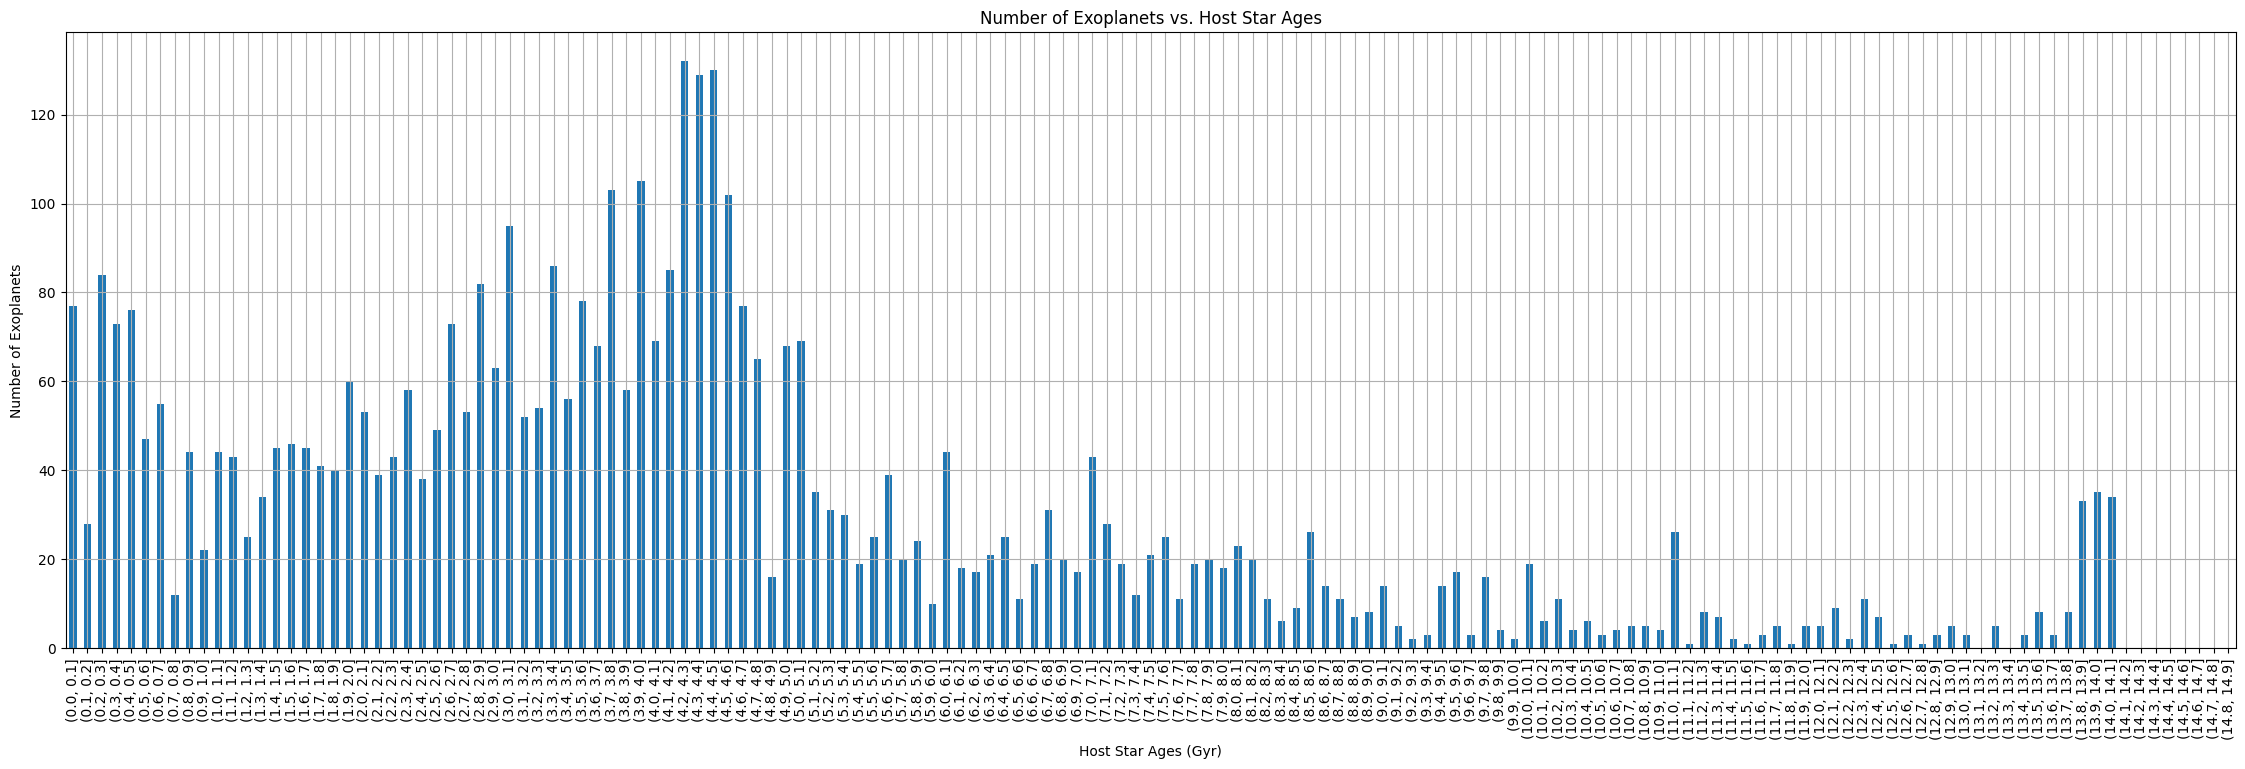

In [66]:
host_star_age_buckets = create_buckets(0, 14.9, 0.1)
host_star_ages_dist = pd.cut(exoplanets_data_with_host_star_ages['st_age'], bins=host_star_age_buckets)
host_star_ages_dist.value_counts().sort_index().plot(kind='bar',
                                                     figsize=(28, 8),
                                                     xlabel='Host Star Ages (Gyr)',
                                                     ylabel='Number of Exoplanets',
                                                     title='Number of Exoplanets vs. Host Star Ages',
                                                     grid=True)
host_star_ages_dist.value_counts().sort_index()

st_age
(0.0, 0.1]      1
(0.1, 0.2]      1
(0.2, 0.3]      2
(0.3, 0.4]      0
(0.4, 0.5]      4
               ..
(14.4, 14.5]    0
(14.5, 14.6]    0
(14.6, 14.7]    0
(14.7, 14.8]    0
(14.8, 14.9]    0
Name: count, Length: 149, dtype: int64

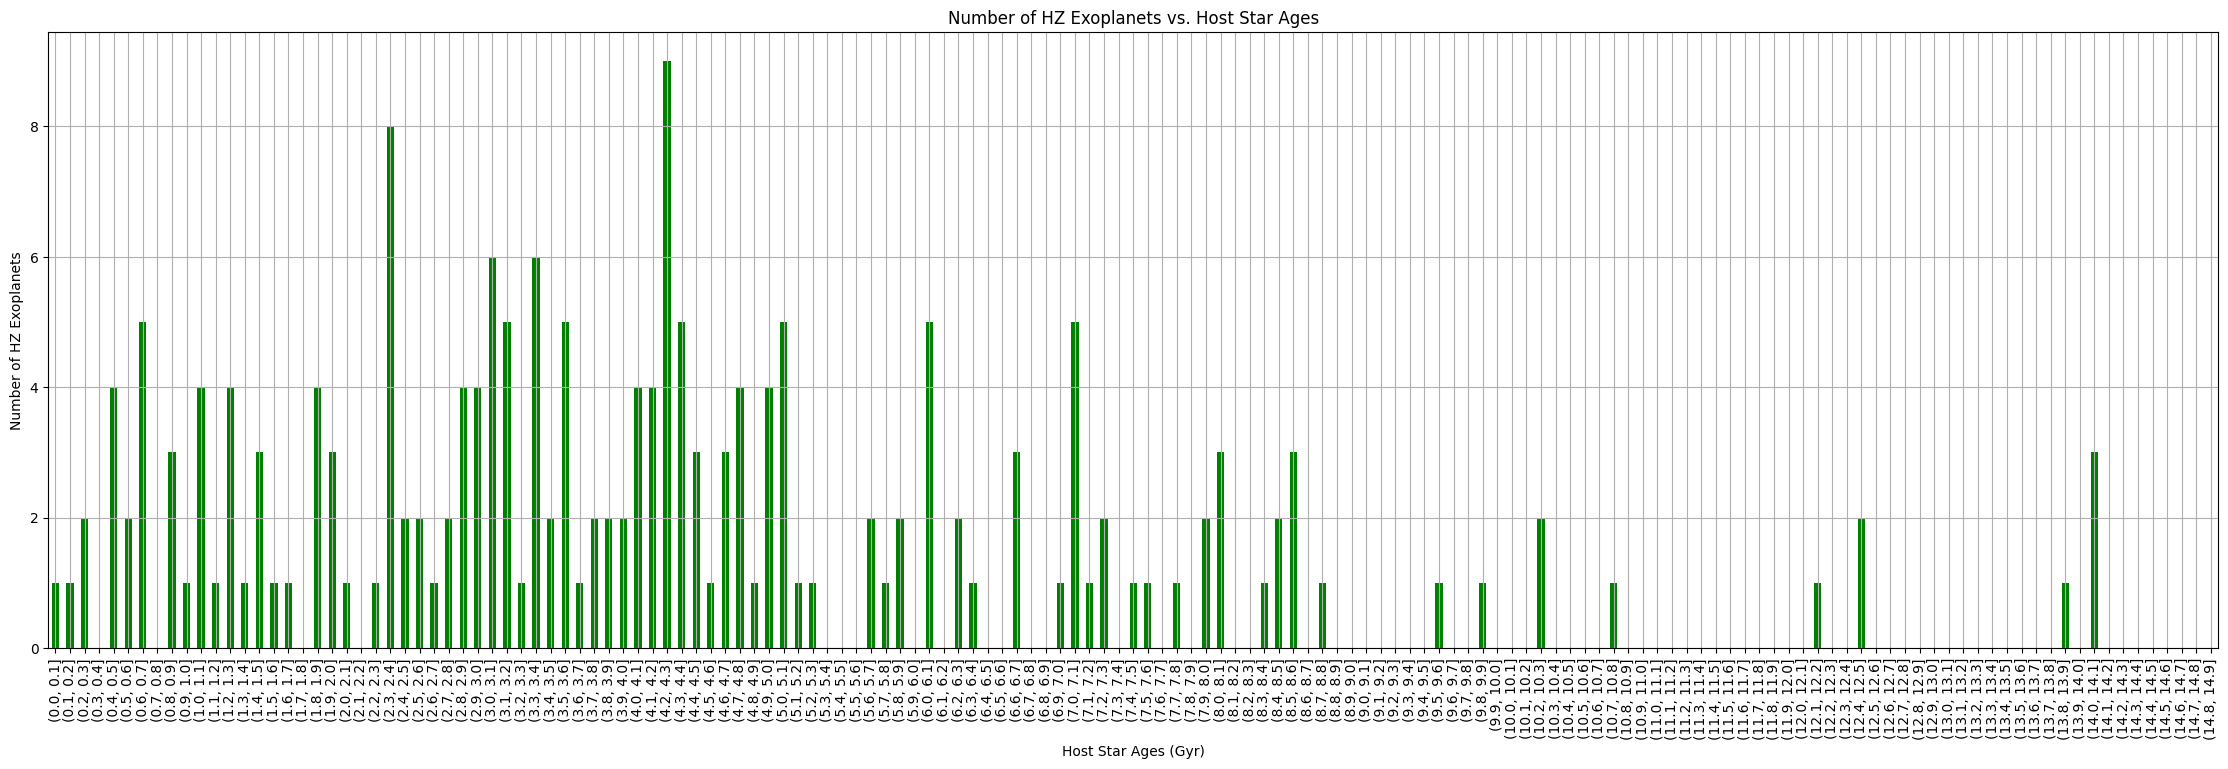

In [67]:
hz_exoplanets_data = exoplanets_data_with_host_star_ages.loc[(exoplanets_data_with_host_star_ages['pl_hz_status'] == 'In HZ')]
hz_host_star_ages_dist = pd.cut(hz_exoplanets_data['st_age'], bins=host_star_age_buckets)
hz_host_star_ages_dist.value_counts().sort_index().plot(kind='bar',
                                                        figsize=(28, 8),
                                                        xlabel='Host Star Ages (Gyr)',
                                                        ylabel='Number of HZ Exoplanets',
                                                        title='Number of HZ Exoplanets vs. Host Star Ages',
                                                        color='green',
                                                        grid=True)
hz_host_star_ages_dist.value_counts().sort_index()

In [122]:
exoplanets_data_with_host_star_ages['pl_orbeccen'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

count    4809.000000
mean        0.076393
std         0.150537
min         0.000000
25%         0.000000
50%         0.000000
75%         0.090000
90%         0.260200
95%         0.402800
99%         0.725520
99.5%       0.818936
99.9%       0.924960
max         0.950000
Name: pl_orbeccen, dtype: float64

pl_orbeccen
(0.0, 0.1]    774
(0.1, 0.2]    449
(0.2, 0.3]    244
(0.3, 0.4]    157
(0.4, 0.5]     87
(0.5, 0.6]     66
(0.6, 0.7]     34
(0.7, 0.8]     28
(0.8, 0.9]     20
(0.9, 1.0]      8
Name: count, dtype: int64

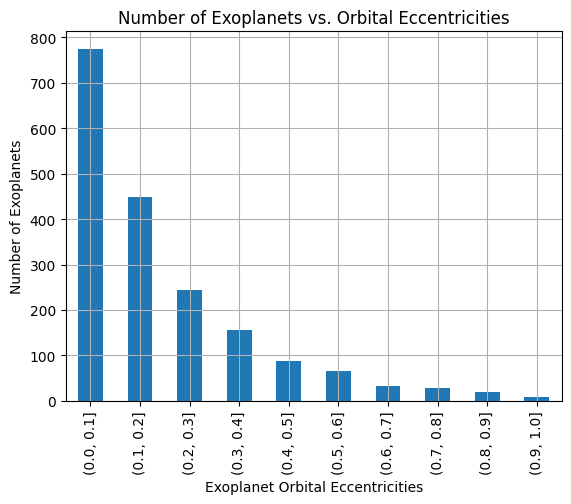

In [114]:
exoplanet_eccentricity_buckets = create_buckets(0, 1, 0.1)
exoplanet_eccentricities_dist = pd.cut(exoplanets_data_with_host_star_ages['pl_orbeccen'], bins=exoplanet_eccentricity_buckets)
exoplanet_eccentricities_dist.value_counts().sort_index().plot(kind='bar',
                                                               xlabel='Exoplanet Orbital Eccentricities',
                                                               ylabel='Number of Exoplanets',
                                                               title='Number of Exoplanets vs. Orbital Eccentricities',
                                                               grid=True)
exoplanet_eccentricities_dist.value_counts().sort_index()

pl_orbeccen
(0.0, 0.1]    51
(0.1, 0.2]    45
(0.2, 0.3]    21
(0.3, 0.4]    14
(0.4, 0.5]     9
(0.5, 0.6]     6
(0.6, 0.7]     5
(0.7, 0.8]     4
(0.8, 0.9]     0
(0.9, 1.0]     0
Name: count, dtype: int64

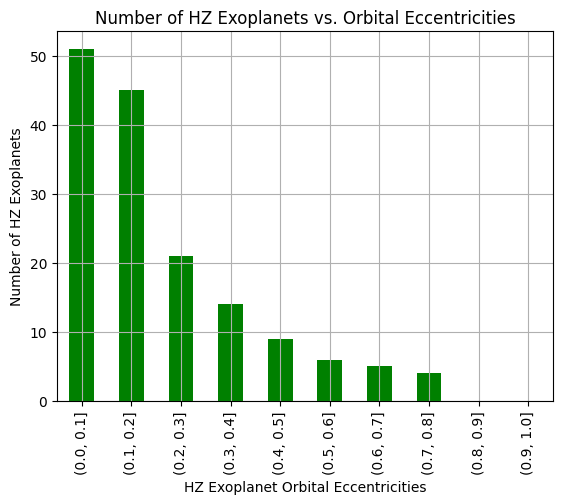

In [116]:
hz_exoplanets_data = exoplanets_data_with_host_star_ages.loc[(exoplanets_data_with_host_star_ages['pl_hz_status'] == 'In HZ')]
hz_exoplanet_eccentricities_dist = pd.cut(hz_exoplanets_data['pl_orbeccen'], bins=exoplanet_eccentricity_buckets)
hz_exoplanet_eccentricities_dist.value_counts().sort_index().plot(kind='bar',
                                                                  xlabel='HZ Exoplanet Orbital Eccentricities',
                                                                  ylabel='Number of HZ Exoplanets',
                                                                  title='Number of HZ Exoplanets vs. Orbital Eccentricities',
                                                                  color='green',
                                                                  grid=True)
hz_exoplanet_eccentricities_dist.value_counts().sort_index()

pl_orbeccen
(0.0, 0.01]     48
(0.01, 0.02]    82
(0.02, 0.03]    69
(0.03, 0.04]    87
(0.04, 0.05]    87
                ..
(0.89, 0.9]      1
(0.9, 0.91]      0
(0.91, 0.92]     1
(0.92, 0.93]     4
(0.93, 0.94]     0
Name: count, Length: 94, dtype: int64

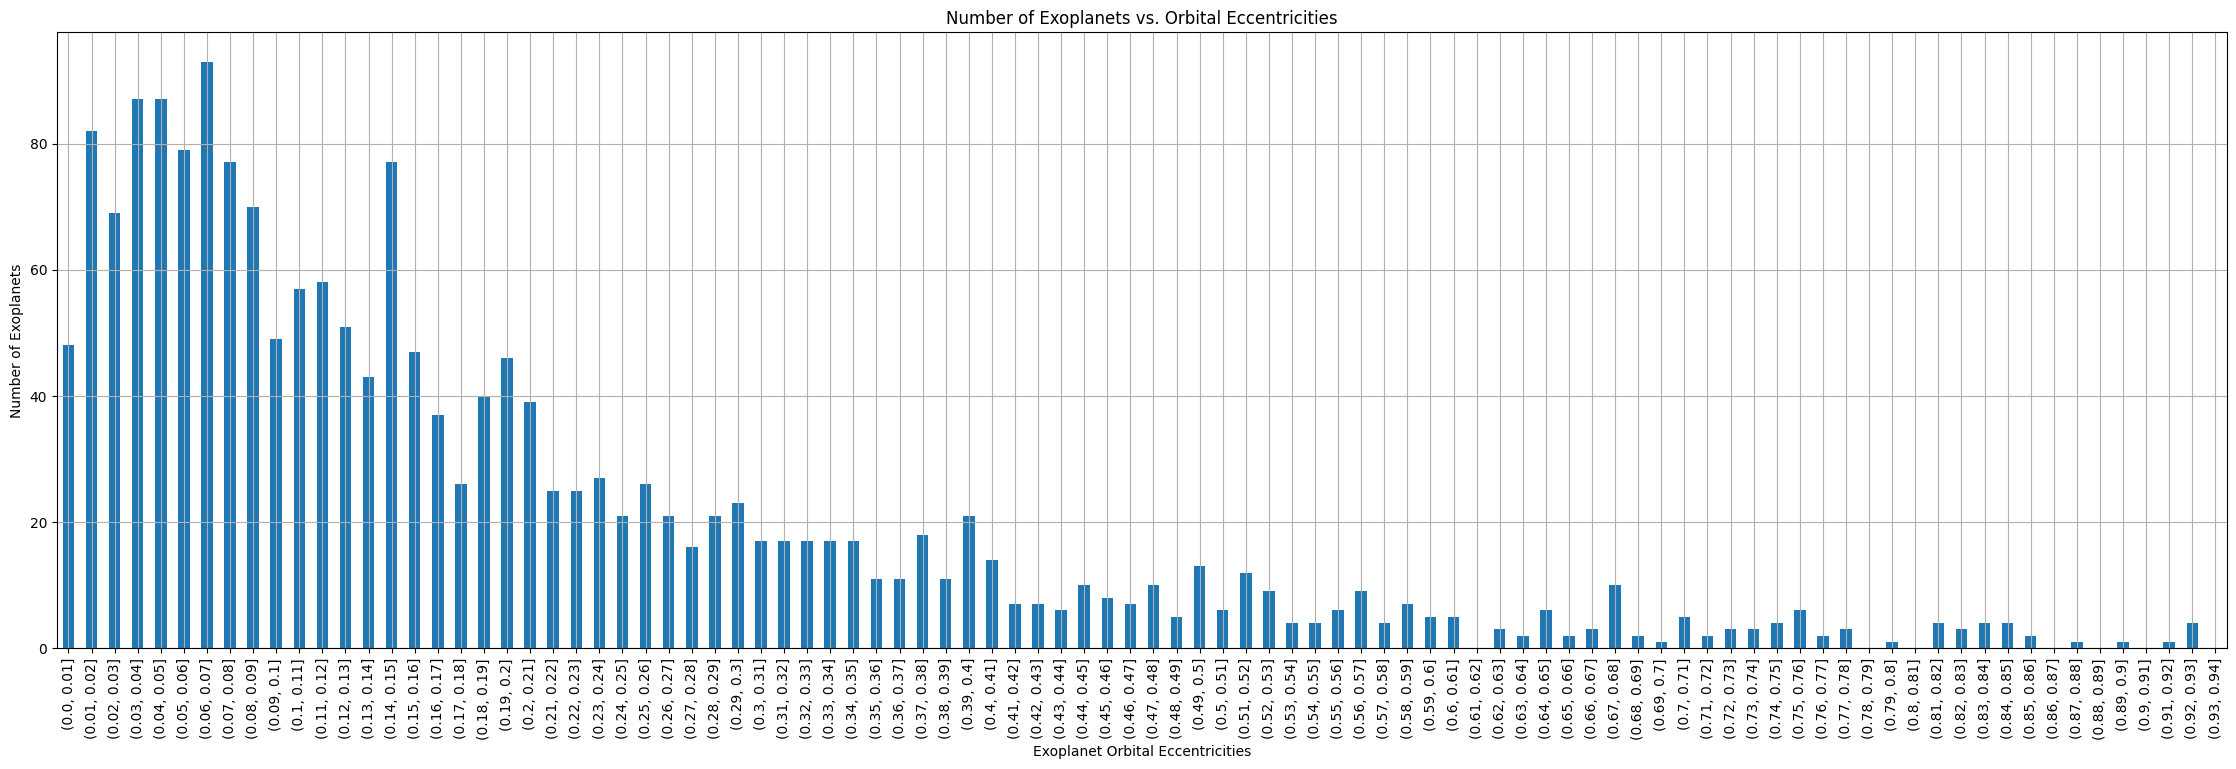

In [117]:
exoplanet_eccentricity_buckets = create_buckets(0, 0.95, 0.01)
exoplanet_eccentricities_dist = pd.cut(exoplanets_data_with_host_star_ages['pl_orbeccen'], bins=exoplanet_eccentricity_buckets)
exoplanet_eccentricities_dist.value_counts().sort_index().plot(kind='bar',
                                                               figsize=(28, 8),
                                                               xlabel='Exoplanet Orbital Eccentricities',
                                                               ylabel='Number of Exoplanets',
                                                               title='Number of Exoplanets vs. Orbital Eccentricities',
                                                               grid=True)
exoplanet_eccentricities_dist.value_counts().sort_index()

pl_orbeccen
(0.0, 0.01]     3
(0.01, 0.02]    2
(0.02, 0.03]    7
(0.03, 0.04]    4
(0.04, 0.05]    4
               ..
(0.89, 0.9]     0
(0.9, 0.91]     0
(0.91, 0.92]    0
(0.92, 0.93]    0
(0.93, 0.94]    0
Name: count, Length: 94, dtype: int64

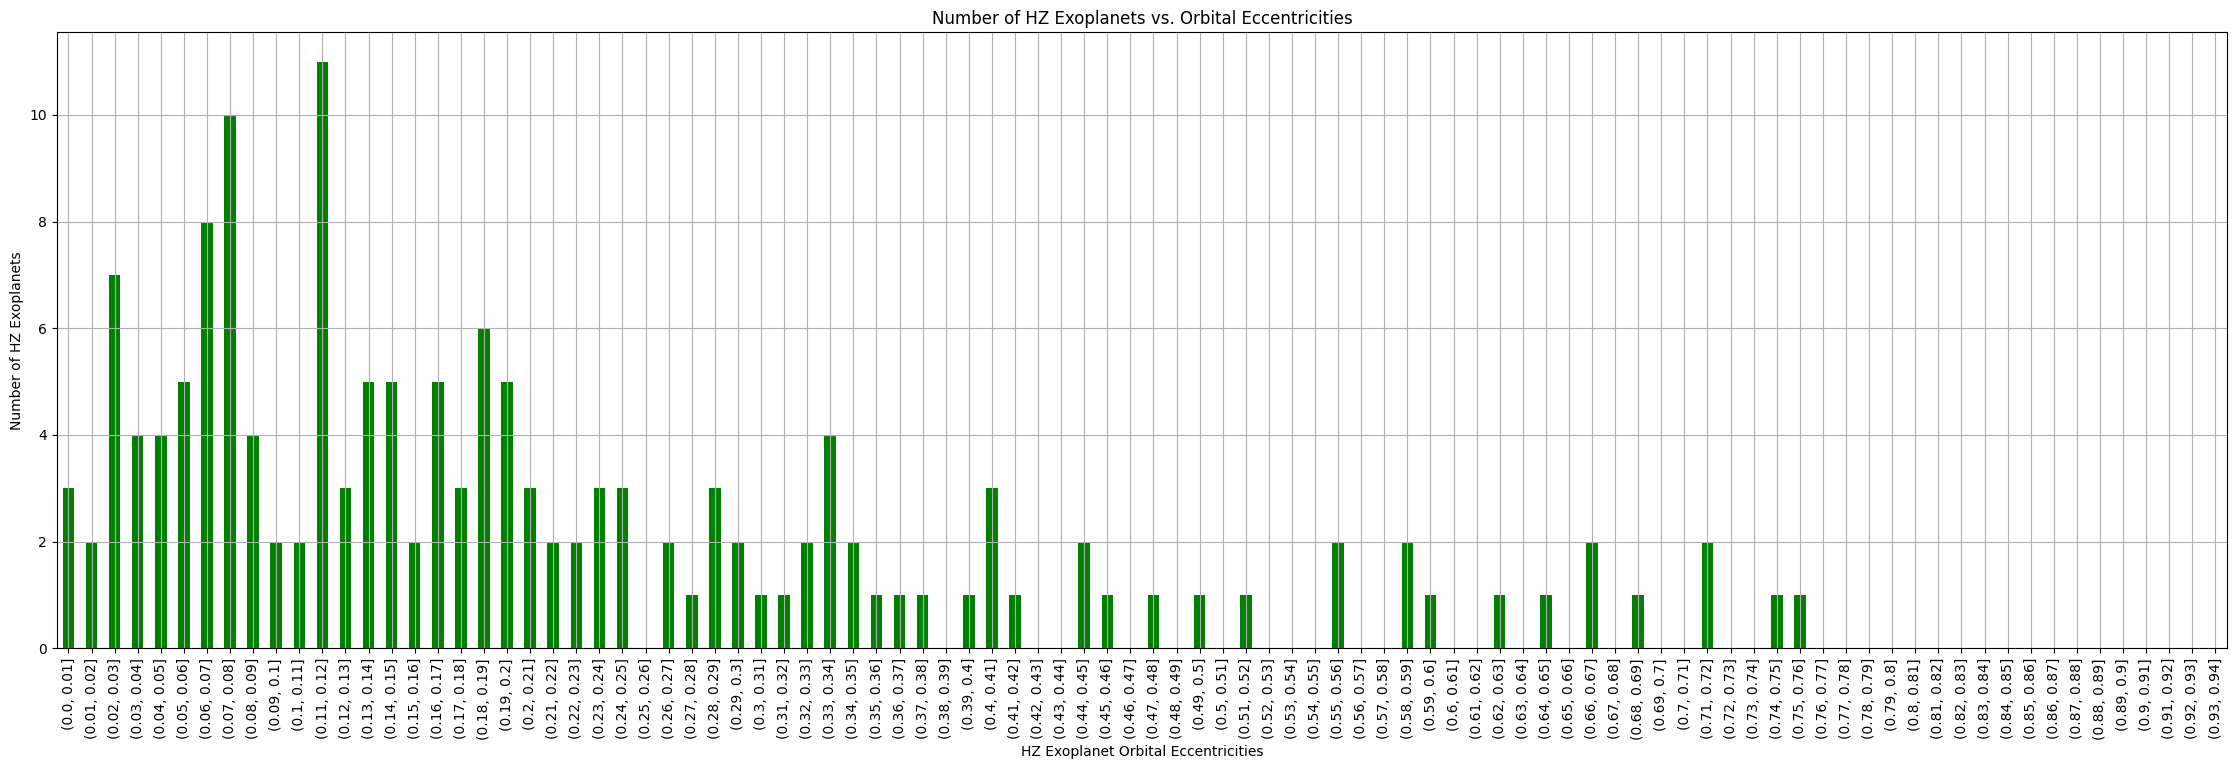

In [119]:
hz_exoplanets_data = exoplanets_data_with_host_star_ages.loc[(exoplanets_data_with_host_star_ages['pl_hz_status'] == 'In HZ')]
hz_exoplanet_eccentricities_dist = pd.cut(hz_exoplanets_data['pl_orbeccen'], bins=exoplanet_eccentricity_buckets)
hz_exoplanet_eccentricities_dist.value_counts().sort_index().plot(kind='bar',
                                                                  figsize=(28, 8),
                                                                  xlabel='HZ Exoplanet Orbital Eccentricities',
                                                                  ylabel='Number of HZ Exoplanets',
                                                                  title='Number of HZ Exoplanets vs. Orbital Eccentricities',
                                                                  color='green',
                                                                  grid=True)
hz_exoplanet_eccentricities_dist.value_counts().sort_index()

In [123]:
exoplanets_data_with_host_star_ages['pl_orbper'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

count    5.334000e+03
mean     8.018026e+04
std      5.506837e+06
min      9.070629e-02
25%      4.463672e+00
50%      1.155834e+01
75%      4.150555e+01
90%      4.825734e+02
95%      1.607012e+03
99%      1.400756e+04
99.5%    2.121237e+04
99.9%    1.480553e+05
max      4.020000e+08
Name: pl_orbper, dtype: float64

pl_orbper
(0, 20]         3384
(20, 40]         588
(40, 60]         246
(60, 80]          95
(80, 100]         90
                ... 
(1500, 1520]       0
(1520, 1540]       3
(1540, 1560]       2
(1560, 1580]       2
(1580, 1600]       1
Name: count, Length: 80, dtype: int64

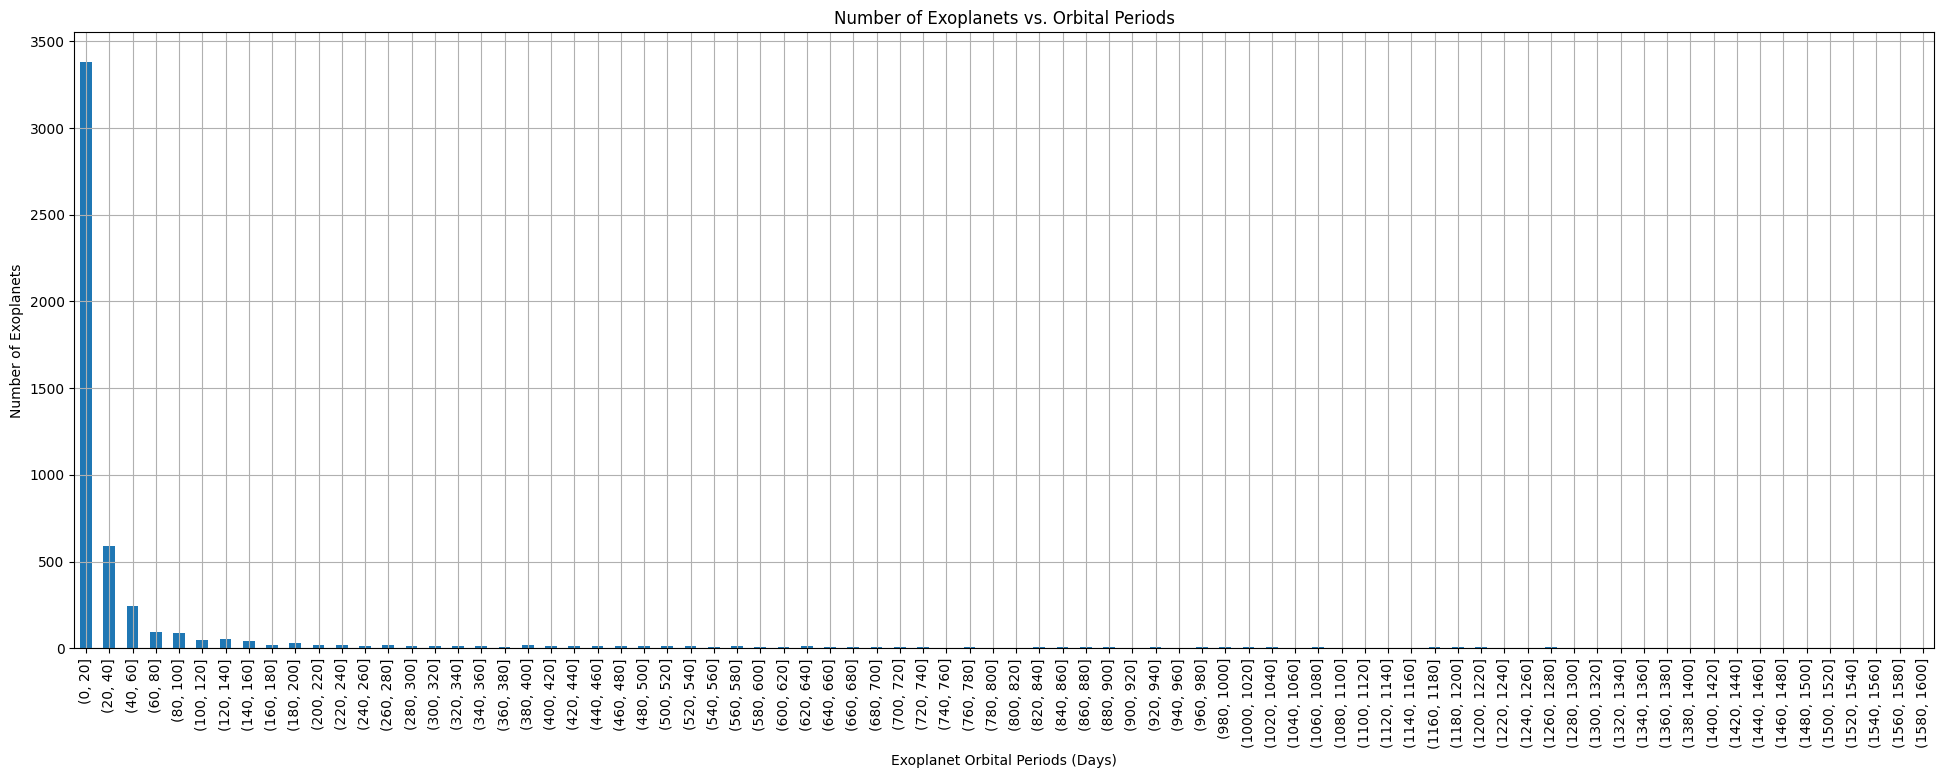

In [124]:
exoplanet_orbit_period_buckets = create_buckets(0, 1600, 20)
exoplanet_orbit_periods_dist = pd.cut(exoplanets_data_with_host_star_ages['pl_orbper'], bins=exoplanet_orbit_period_buckets)
exoplanet_orbit_periods_dist.value_counts().sort_index().plot(kind='bar',
                                                              figsize=(24, 8),
                                                              xlabel='Exoplanet Orbital Periods (Days)',
                                                              ylabel='Number of Exoplanets',
                                                              title='Number of Exoplanets vs. Orbital Periods',
                                                              grid=True)
exoplanet_orbit_periods_dist.value_counts().sort_index()

pl_orbper
(0, 20]         3384
(20, 40]         588
(40, 60]         246
(60, 80]          95
(80, 100]         90
                ... 
(1500, 1520]       0
(1520, 1540]       3
(1540, 1560]       2
(1560, 1580]       2
(1580, 1600]       1
Name: count, Length: 80, dtype: int64

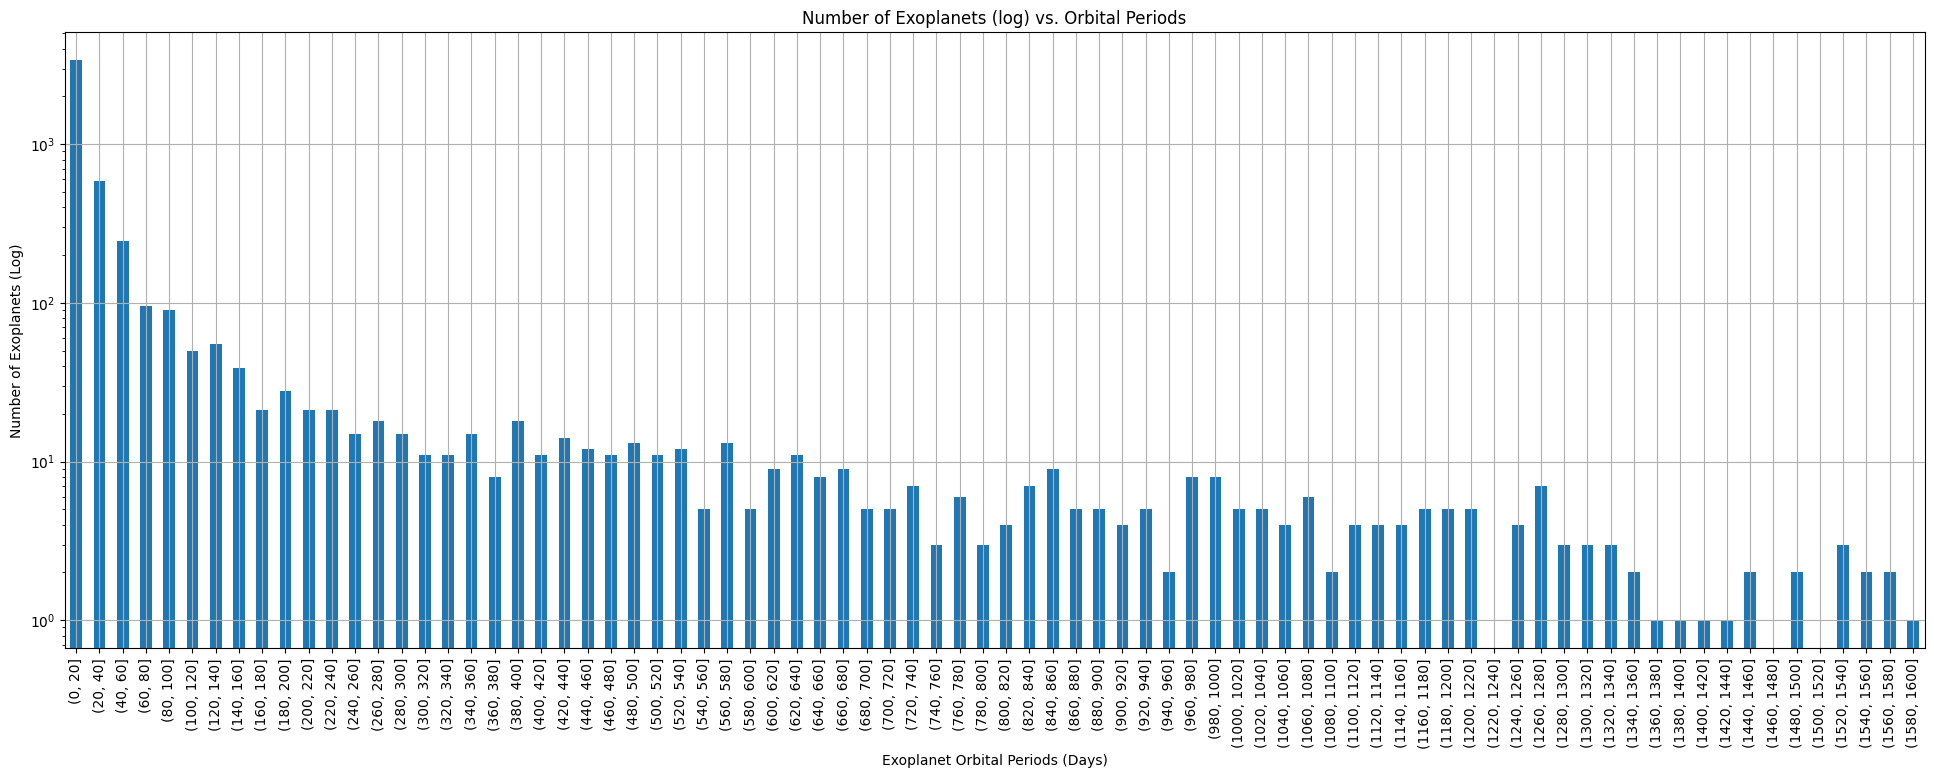

In [125]:
exoplanet_orbit_periods_dist.value_counts().sort_index().plot(kind='bar',
                                                              figsize=(24, 8),
                                                              xlabel='Exoplanet Orbital Periods (Days)',
                                                              ylabel='Number of Exoplanets (Log)',
                                                              title='Number of Exoplanets (log) vs. Orbital Periods',
                                                              grid=True,
                                                              logy=True)
exoplanet_orbit_periods_dist.value_counts().sort_index()

pl_orbper
(0, 20]         35
(20, 40]        25
(40, 60]        13
(60, 80]        11
(80, 100]       14
                ..
(1500, 1520]     0
(1520, 1540]     0
(1540, 1560]     0
(1560, 1580]     1
(1580, 1600]     0
Name: count, Length: 80, dtype: int64

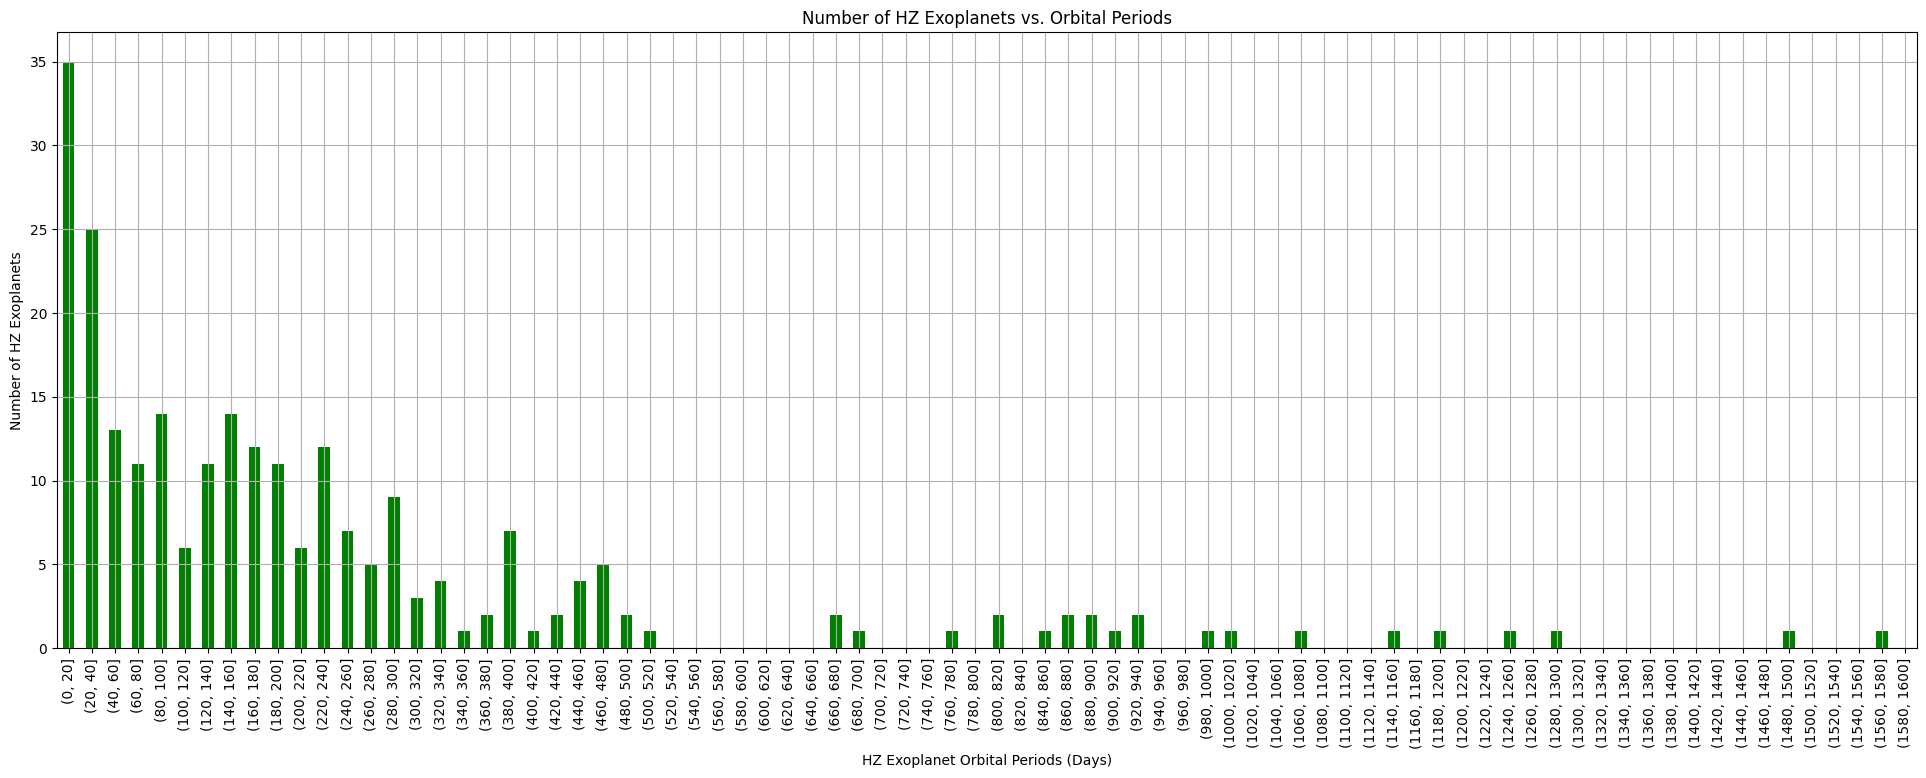

In [126]:
hz_exoplanets_data = exoplanets_data_with_host_star_ages.loc[(exoplanets_data_with_host_star_ages['pl_hz_status'] == 'In HZ')]
hz_exoplanet_orbit_periods_dist = pd.cut(hz_exoplanets_data['pl_orbper'], bins=exoplanet_orbit_period_buckets)
hz_exoplanet_orbit_periods_dist.value_counts().sort_index().plot(kind='bar',
                                                                 figsize=(24, 8),
                                                                 xlabel='HZ Exoplanet Orbital Periods (Days)',
                                                                 ylabel='Number of HZ Exoplanets',
                                                                 title='Number of HZ Exoplanets vs. Orbital Periods',
                                                                 color='green',
                                                                 grid=True)
hz_exoplanet_orbit_periods_dist.value_counts().sort_index()

In [128]:
exoplanets_data_with_host_star_ages['pl_orbsmax'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

count    5288.000000
mean        6.657748
std       134.408325
min         0.004400
25%         0.053200
50%         0.103450
75%         0.301000
90%         1.910600
95%         3.696850
99%        23.164800
99.5%     205.650000
99.9%    1500.706000
max      7506.000000
Name: pl_orbsmax, dtype: float64

pl_orbsmax
(0.0, 0.1]    2571
(0.1, 0.2]    1036
(0.2, 0.3]     355
(0.3, 0.4]     165
(0.4, 0.5]     100
(0.5, 0.6]      74
(0.6, 0.7]      53
(0.7, 0.8]      46
(0.8, 0.9]      37
(0.9, 1.0]      36
(1.0, 1.1]      35
(1.1, 1.2]      51
(1.2, 1.3]      38
(1.3, 1.4]      39
(1.4, 1.5]      24
(1.5, 1.6]      23
(1.6, 1.7]      26
(1.7, 1.8]      25
(1.8, 1.9]      24
(1.9, 2.0]      23
(2.0, 2.1]      27
(2.1, 2.2]      19
(2.2, 2.3]       9
(2.3, 2.4]      20
(2.4, 2.5]      24
(2.5, 2.6]      13
(2.6, 2.7]      15
(2.7, 2.8]      21
(2.8, 2.9]      10
(2.9, 3.0]      11
(3.0, 3.1]       9
(3.1, 3.2]      11
(3.2, 3.3]      11
(3.3, 3.4]      12
(3.4, 3.5]      13
(3.5, 3.6]      13
Name: count, dtype: int64

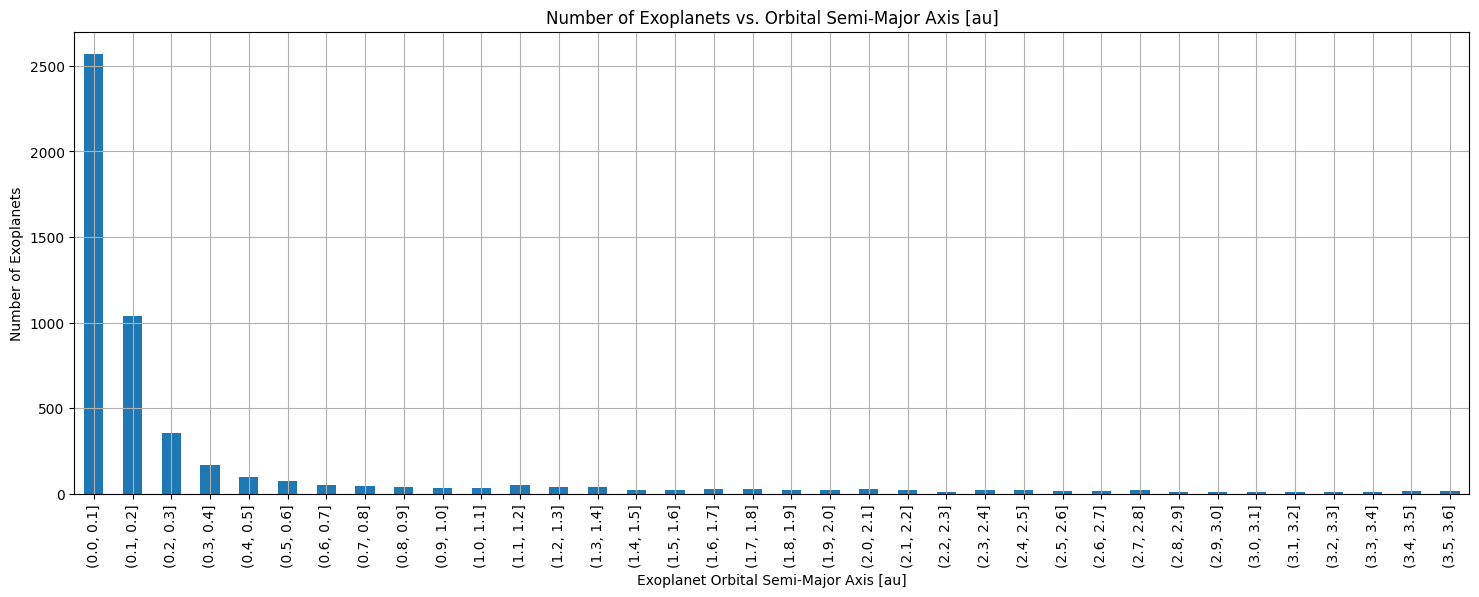

In [129]:
exoplanet_orbit_au_buckets = create_buckets(0, 3.7, 0.1)
exoplanet_orbit_au_dist = pd.cut(exoplanets_data_with_host_star_ages['pl_orbsmax'], bins=exoplanet_orbit_au_buckets)
exoplanet_orbit_au_dist.value_counts().sort_index().plot(kind='bar',
                                                         figsize=(18, 6),
                                                         xlabel='Exoplanet Orbital Semi-Major Axis [au]',
                                                         ylabel='Number of Exoplanets',
                                                         title='Number of Exoplanets vs. Orbital Semi-Major Axis [au]',
                                                         grid=True)
exoplanet_orbit_au_dist.value_counts().sort_index()

pl_orbsmax
(0.0, 0.1]    2571
(0.1, 0.2]    1036
(0.2, 0.3]     355
(0.3, 0.4]     165
(0.4, 0.5]     100
(0.5, 0.6]      74
(0.6, 0.7]      53
(0.7, 0.8]      46
(0.8, 0.9]      37
(0.9, 1.0]      36
(1.0, 1.1]      35
(1.1, 1.2]      51
(1.2, 1.3]      38
(1.3, 1.4]      39
(1.4, 1.5]      24
(1.5, 1.6]      23
(1.6, 1.7]      26
(1.7, 1.8]      25
(1.8, 1.9]      24
(1.9, 2.0]      23
(2.0, 2.1]      27
(2.1, 2.2]      19
(2.2, 2.3]       9
(2.3, 2.4]      20
(2.4, 2.5]      24
(2.5, 2.6]      13
(2.6, 2.7]      15
(2.7, 2.8]      21
(2.8, 2.9]      10
(2.9, 3.0]      11
(3.0, 3.1]       9
(3.1, 3.2]      11
(3.2, 3.3]      11
(3.3, 3.4]      12
(3.4, 3.5]      13
(3.5, 3.6]      13
Name: count, dtype: int64

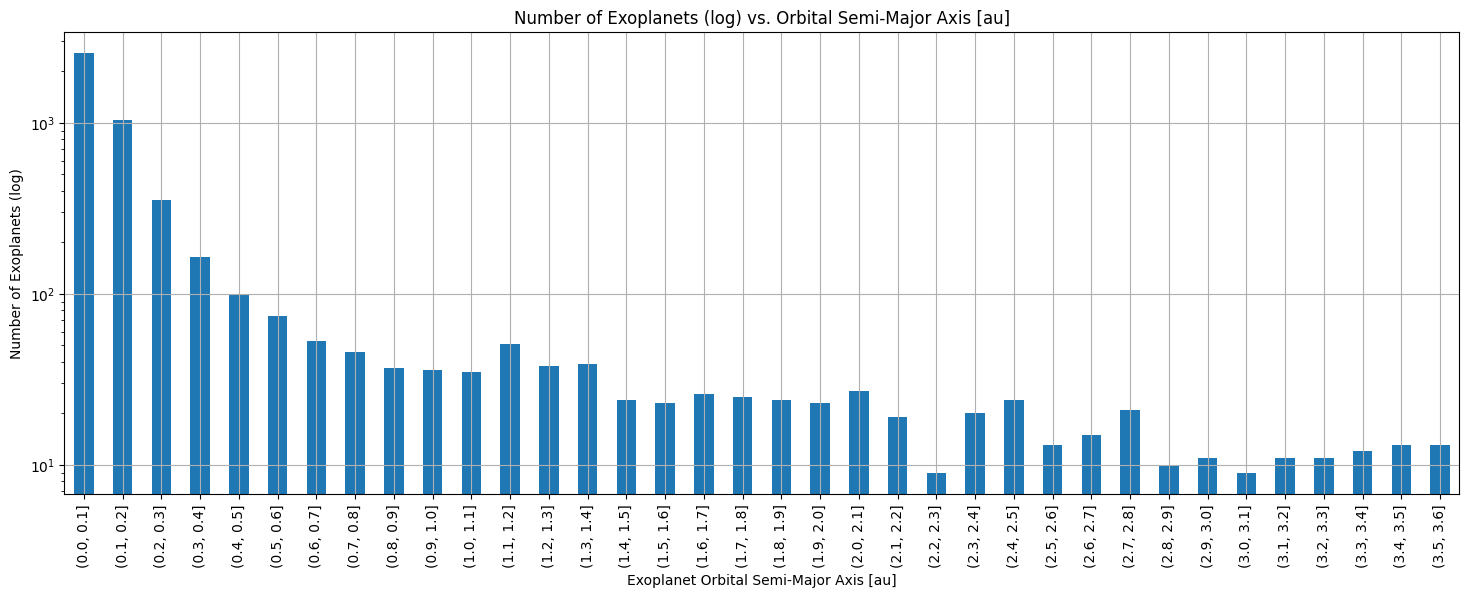

In [130]:
exoplanet_orbit_au_dist.value_counts().sort_index().plot(kind='bar',
                                                         figsize=(18, 6),
                                                         xlabel='Exoplanet Orbital Semi-Major Axis [au]',
                                                         ylabel='Number of Exoplanets (log)',
                                                         title='Number of Exoplanets (log) vs. Orbital Semi-Major Axis [au]',
                                                         grid=True,
                                                         logy=True)
exoplanet_orbit_au_dist.value_counts().sort_index()

pl_orbsmax
(0.0, 0.1]    33
(0.1, 0.2]    28
(0.2, 0.3]    20
(0.3, 0.4]    19
(0.4, 0.5]    17
(0.5, 0.6]    23
(0.6, 0.7]    19
(0.7, 0.8]    16
(0.8, 0.9]    15
(0.9, 1.0]     7
(1.0, 1.1]    10
(1.1, 1.2]     6
(1.2, 1.3]     9
(1.3, 1.4]     2
(1.4, 1.5]     0
(1.5, 1.6]     1
(1.6, 1.7]     2
(1.7, 1.8]     0
(1.8, 1.9]     3
(1.9, 2.0]     4
(2.0, 2.1]     3
(2.1, 2.2]     2
(2.2, 2.3]     1
(2.3, 2.4]     0
(2.4, 2.5]     3
(2.5, 2.6]     0
(2.6, 2.7]     1
(2.7, 2.8]     2
(2.8, 2.9]     1
(2.9, 3.0]     0
(3.0, 3.1]     0
(3.1, 3.2]     0
(3.2, 3.3]     1
(3.3, 3.4]     1
(3.4, 3.5]     1
(3.5, 3.6]     0
Name: count, dtype: int64

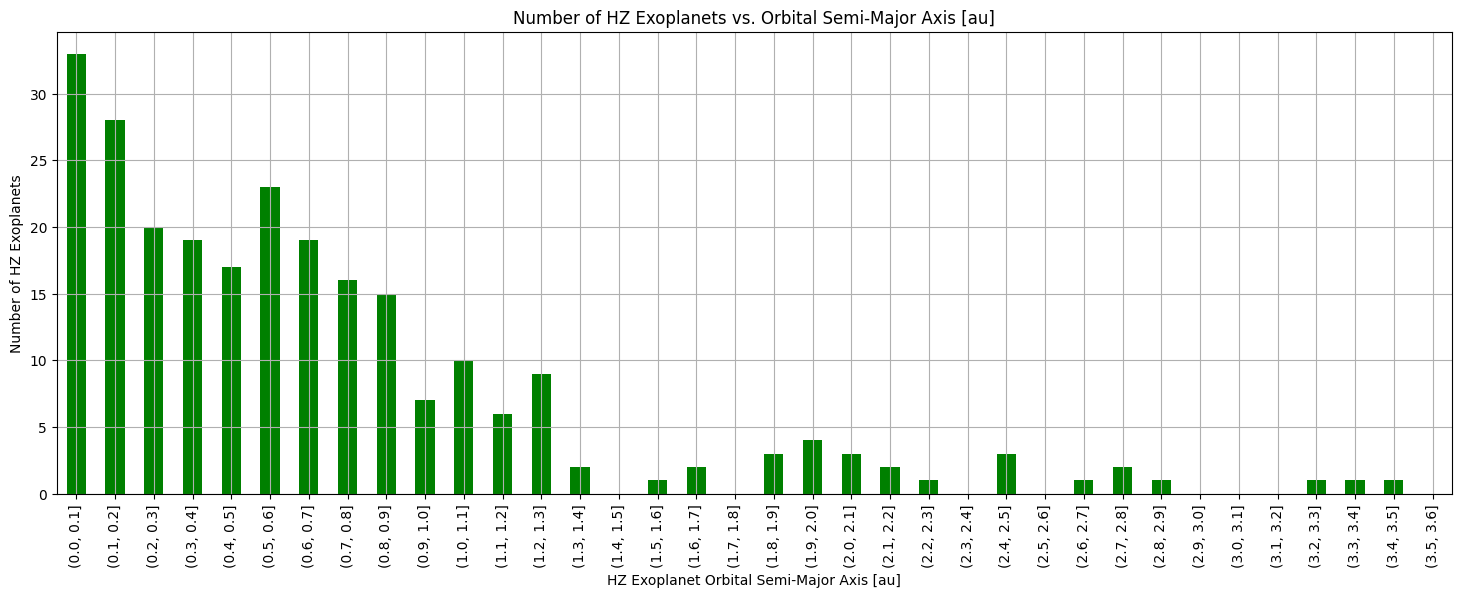

In [131]:
hz_exoplanets_data = exoplanets_data_with_host_star_ages.loc[(exoplanets_data_with_host_star_ages['pl_hz_status'] == 'In HZ')]
hz_exoplanet_orbit_au_dist = pd.cut(hz_exoplanets_data['pl_orbsmax'], bins=exoplanet_orbit_au_buckets)
hz_exoplanet_orbit_au_dist.value_counts().sort_index().plot(kind='bar',
                                                            figsize=(18, 6),
                                                            xlabel='HZ Exoplanet Orbital Semi-Major Axis [au]',
                                                            ylabel='Number of HZ Exoplanets',
                                                            title='Number of HZ Exoplanets vs. Orbital Semi-Major Axis [au]',
                                                            color='green',
                                                            grid=True)
hz_exoplanet_orbit_au_dist.value_counts().sort_index()

In [134]:
exoplanets_data_with_host_star_ages['pl_bmasse'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

count     5558.000000
mean       428.747664
std       2267.626599
min          0.020000
25%          4.032500
50%          8.700000
75%        162.092490
90%        916.302510
95%       2230.519761
99%       6159.946779
99.5%     7636.628406
99.9%    36164.500000
max      89700.000000
Name: pl_bmasse, dtype: float64

pl_bmasse
(0, 20]         3547
(20, 40]         230
(40, 60]          98
(60, 80]          86
(80, 100]         60
                ... 
(2120, 2140]       2
(2140, 2160]       4
(2160, 2180]       1
(2180, 2200]       2
(2200, 2220]       2
Name: count, Length: 111, dtype: int64

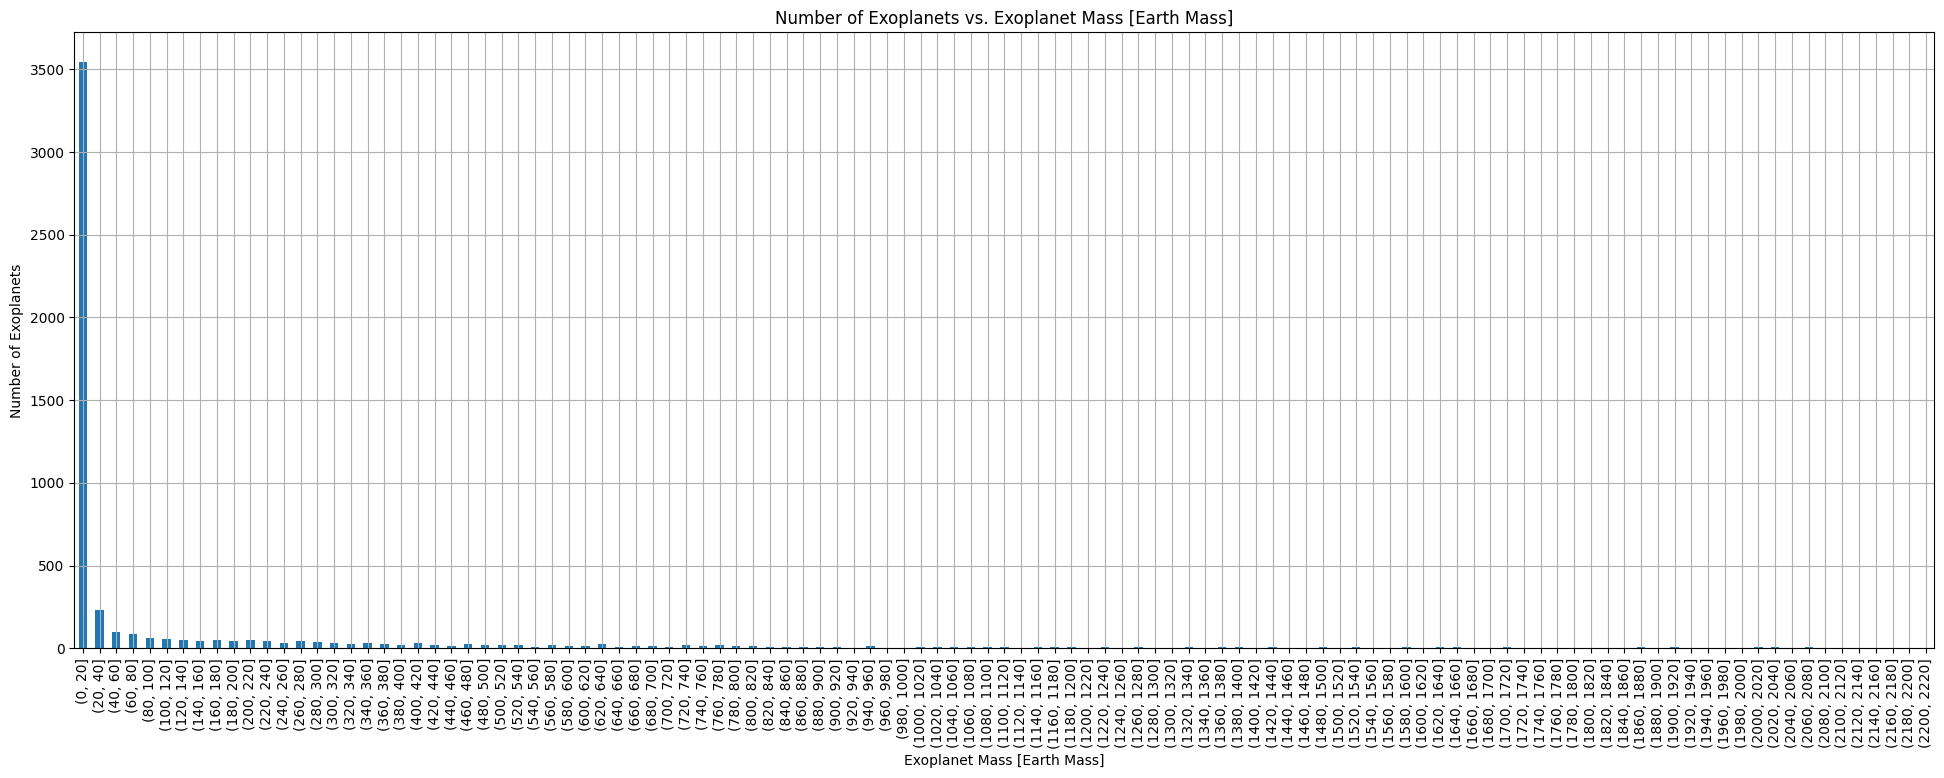

In [135]:
exoplanet_mass_buckets = create_buckets(0, 2230, 20)
exoplanet_mass_dist = pd.cut(exoplanets_data_with_host_star_ages['pl_bmasse'], bins=exoplanet_mass_buckets)
exoplanet_mass_dist.value_counts().sort_index().plot(kind='bar',
                                                         figsize=(24, 8),
                                                         xlabel='Exoplanet Mass [Earth Mass]',
                                                         ylabel='Number of Exoplanets',
                                                         title='Number of Exoplanets vs. Exoplanet Mass [Earth Mass]',
                                                         grid=True)
exoplanet_mass_dist.value_counts().sort_index()

pl_bmasse
(0, 20]         3547
(20, 40]         230
(40, 60]          98
(60, 80]          86
(80, 100]         60
                ... 
(2120, 2140]       2
(2140, 2160]       4
(2160, 2180]       1
(2180, 2200]       2
(2200, 2220]       2
Name: count, Length: 111, dtype: int64

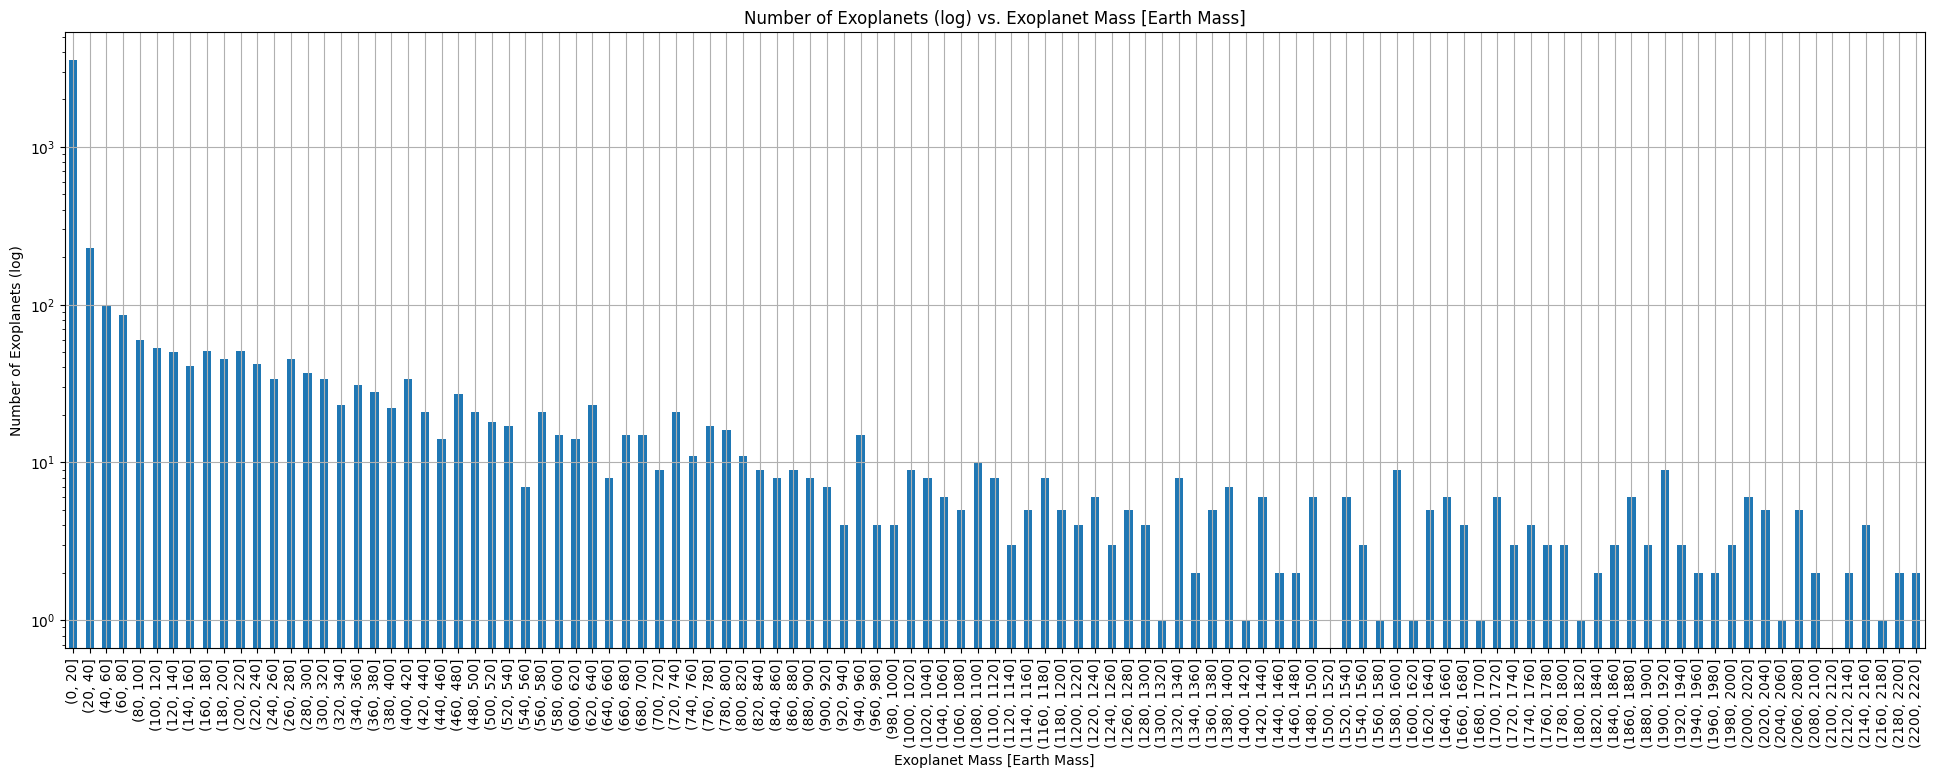

In [136]:
exoplanet_mass_dist.value_counts().sort_index().plot(kind='bar',
                                                     figsize=(24, 8),
                                                     xlabel='Exoplanet Mass [Earth Mass]',
                                                     ylabel='Number of Exoplanets (log)',
                                                     title='Number of Exoplanets (log) vs. Exoplanet Mass [Earth Mass]',
                                                     logy=True,
                                                     grid=True)
exoplanet_mass_dist.value_counts().sort_index()

pl_bmasse
(0, 20]         148
(20, 40]         18
(40, 60]          9
(60, 80]          6
(80, 100]         1
               ... 
(2120, 2140]      0
(2140, 2160]      0
(2160, 2180]      0
(2180, 2200]      0
(2200, 2220]      1
Name: count, Length: 111, dtype: int64

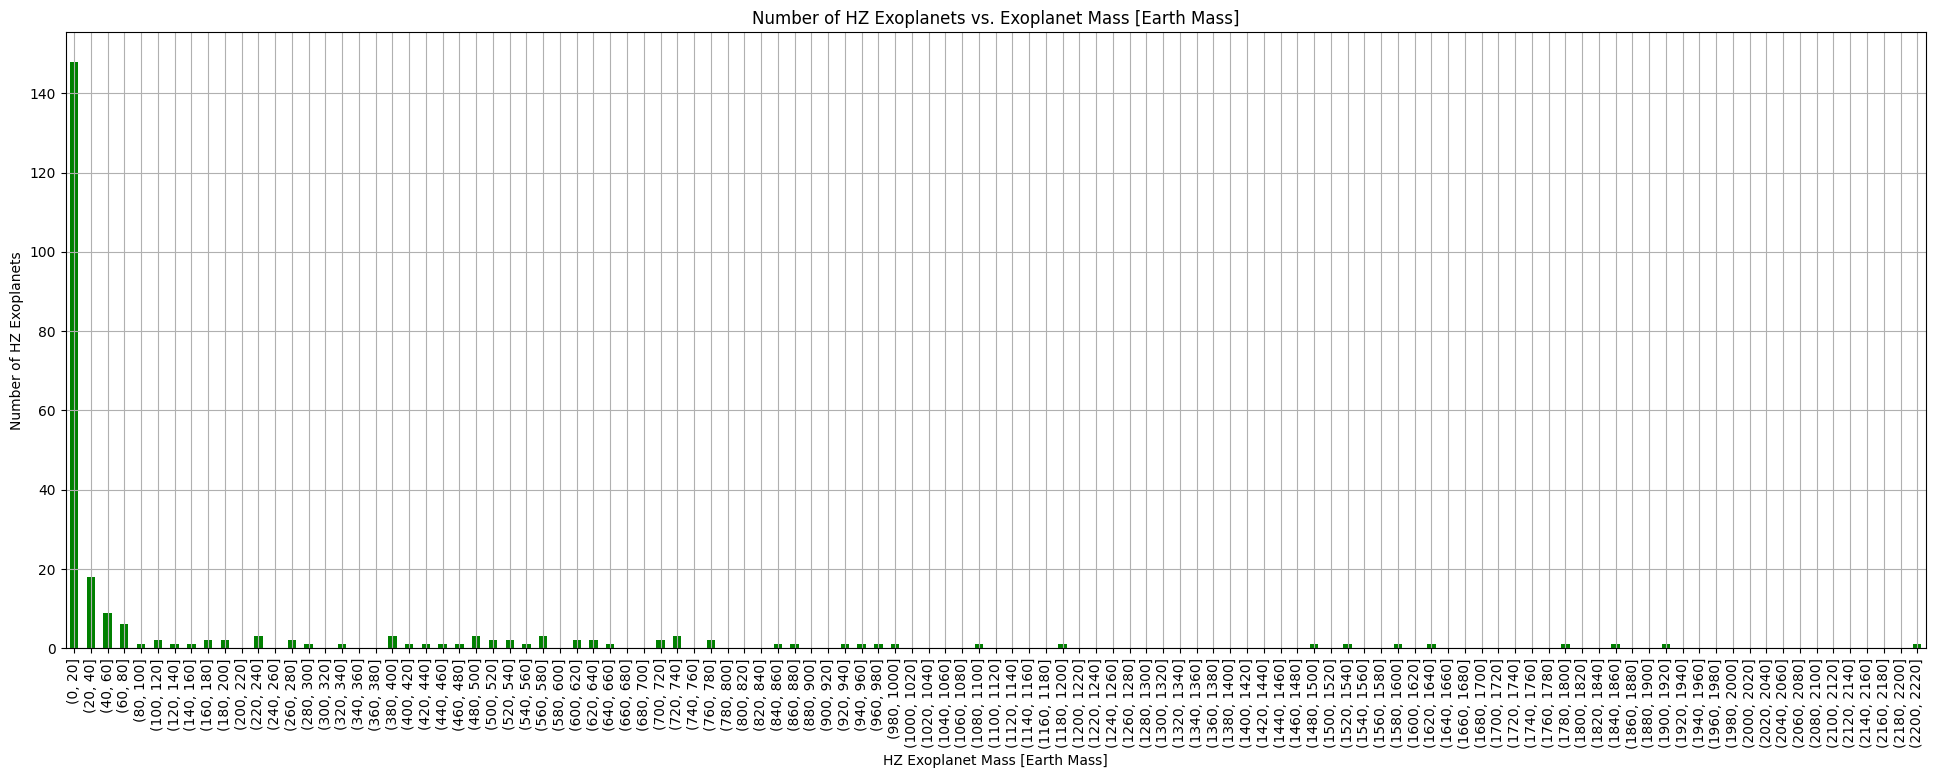

In [137]:
hz_exoplanets_data = exoplanets_data_with_host_star_ages.loc[(exoplanets_data_with_host_star_ages['pl_hz_status'] == 'In HZ')]
hz_exoplanet_mass_dist = pd.cut(hz_exoplanets_data['pl_bmasse'], bins=exoplanet_mass_buckets)
hz_exoplanet_mass_dist.value_counts().sort_index().plot(kind='bar',
                                                        figsize=(24, 8),
                                                        xlabel='HZ Exoplanet Mass [Earth Mass]',
                                                        ylabel='Number of HZ Exoplanets',
                                                        title='Number of HZ Exoplanets vs. Exoplanet Mass [Earth Mass]',
                                                        color='green',
                                                        grid=True)
hz_exoplanet_mass_dist.value_counts().sort_index()

In [140]:
exoplanets_data_with_host_star_ages['st_logg'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

count    5338.000000
mean        4.375791
std         0.441879
min         0.540000
25%         4.290000
50%         4.450000
75%         4.570000
90%         4.690000
95%         4.800000
99%         5.066300
99.5%       5.190000
99.9%       5.510000
max         7.920000
Name: st_logg, dtype: float64

st_logg
(0.5, 0.6]       1
(0.6, 0.7]       0
(0.7, 0.8]       0
(0.8, 0.9]       1
(0.9, 1.0]       1
(1.0, 1.1]       0
(1.1, 1.2]       2
(1.2, 1.3]       3
(1.3, 1.4]       4
(1.4, 1.5]       2
(1.5, 1.6]       2
(1.6, 1.7]       7
(1.7, 1.8]       6
(1.8, 1.9]       3
(1.9, 2.0]       5
(2.0, 2.1]       5
(2.1, 2.2]       4
(2.2, 2.3]       2
(2.3, 2.4]       9
(2.4, 2.5]      18
(2.5, 2.6]      13
(2.6, 2.7]      13
(2.7, 2.8]       6
(2.8, 2.9]      10
(2.9, 3.0]      14
(3.0, 3.1]      15
(3.1, 3.2]      20
(3.2, 3.3]      24
(3.3, 3.4]      23
(3.4, 3.5]      15
(3.5, 3.6]       7
(3.6, 3.7]      22
(3.7, 3.8]      24
(3.8, 3.9]      40
(3.9, 4.0]      91
(4.0, 4.1]     177
(4.1, 4.2]     310
(4.2, 4.3]     543
(4.3, 4.4]     734
(4.4, 4.5]    1092
(4.5, 4.6]    1035
(4.6, 4.7]     508
(4.7, 4.8]     257
(4.8, 4.9]     117
(4.9, 5.0]      60
(5.0, 5.1]      44
(5.1, 5.2]      24
(5.2, 5.3]      10
(5.3, 5.4]       3
(5.4, 5.5]       3
(5.5, 5.6]       6
Name: count, dtype: int

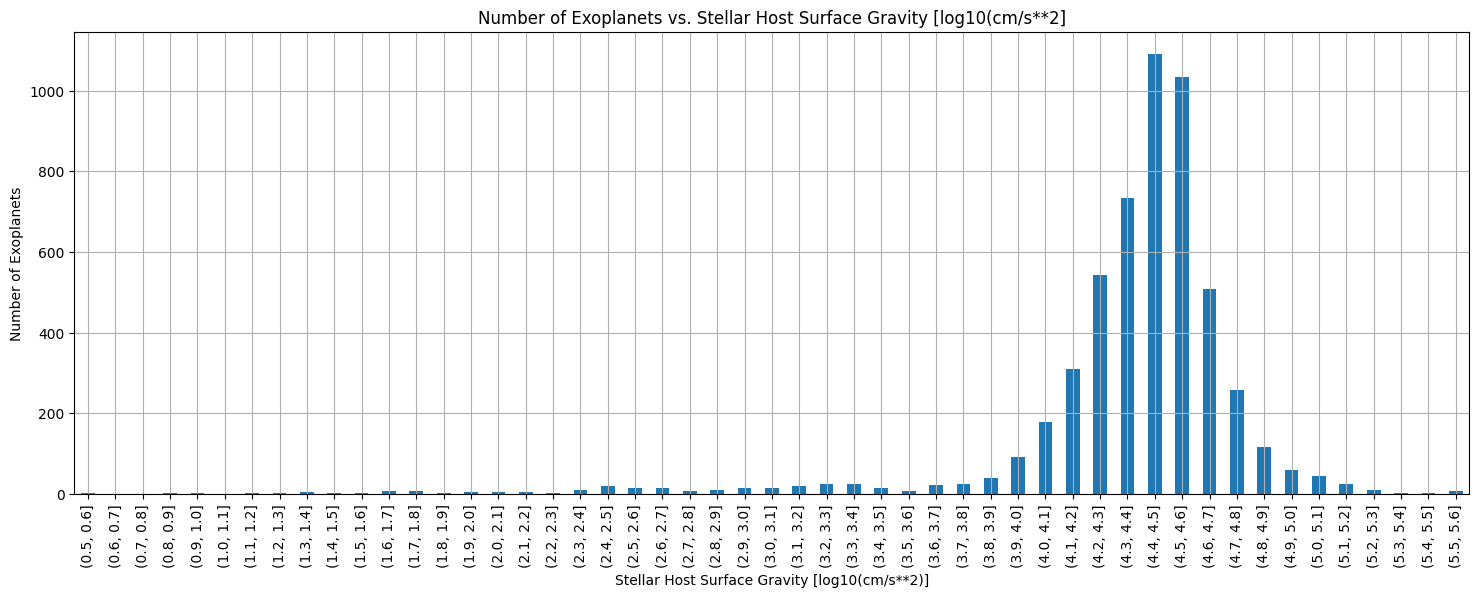

In [144]:
stellar_surface_gravity_buckets = create_buckets(0.50, 5.60, 0.1)
stellar_surface_gravity_dist = pd.cut(exoplanets_data_with_host_star_ages['st_logg'], bins=stellar_surface_gravity_buckets)
stellar_surface_gravity_dist.value_counts().sort_index().plot(kind='bar',
                                                              figsize=(18, 6),
                                                              xlabel='Stellar Host Surface Gravity [log10(cm/s**2)]',
                                                              ylabel='Number of Exoplanets',
                                                              title='Number of Exoplanets vs. Stellar Host Surface Gravity [log10(cm/s**2]',
                                                              grid=True)
stellar_surface_gravity_dist.value_counts().sort_index()

st_logg
(0.5, 0.6]     0
(0.6, 0.7]     0
(0.7, 0.8]     0
(0.8, 0.9]     0
(0.9, 1.0]     0
(1.0, 1.1]     0
(1.1, 1.2]     0
(1.2, 1.3]     0
(1.3, 1.4]     0
(1.4, 1.5]     0
(1.5, 1.6]     0
(1.6, 1.7]     0
(1.7, 1.8]     0
(1.8, 1.9]     0
(1.9, 2.0]     0
(2.0, 2.1]     0
(2.1, 2.2]     0
(2.2, 2.3]     0
(2.3, 2.4]     1
(2.4, 2.5]     0
(2.5, 2.6]     0
(2.6, 2.7]     3
(2.7, 2.8]     0
(2.8, 2.9]     2
(2.9, 3.0]     1
(3.0, 3.1]     3
(3.1, 3.2]     3
(3.2, 3.3]     6
(3.3, 3.4]     3
(3.4, 3.5]     0
(3.5, 3.6]     0
(3.6, 3.7]     1
(3.7, 3.8]     0
(3.8, 3.9]     2
(3.9, 4.0]     3
(4.0, 4.1]     6
(4.1, 4.2]    10
(4.2, 4.3]    15
(4.3, 4.4]    19
(4.4, 4.5]    35
(4.5, 4.6]    44
(4.6, 4.7]    31
(4.7, 4.8]    24
(4.8, 4.9]    17
(4.9, 5.0]    10
(5.0, 5.1]     7
(5.1, 5.2]     6
(5.2, 5.3]     3
(5.3, 5.4]     0
(5.4, 5.5]     0
(5.5, 5.6]     0
Name: count, dtype: int64

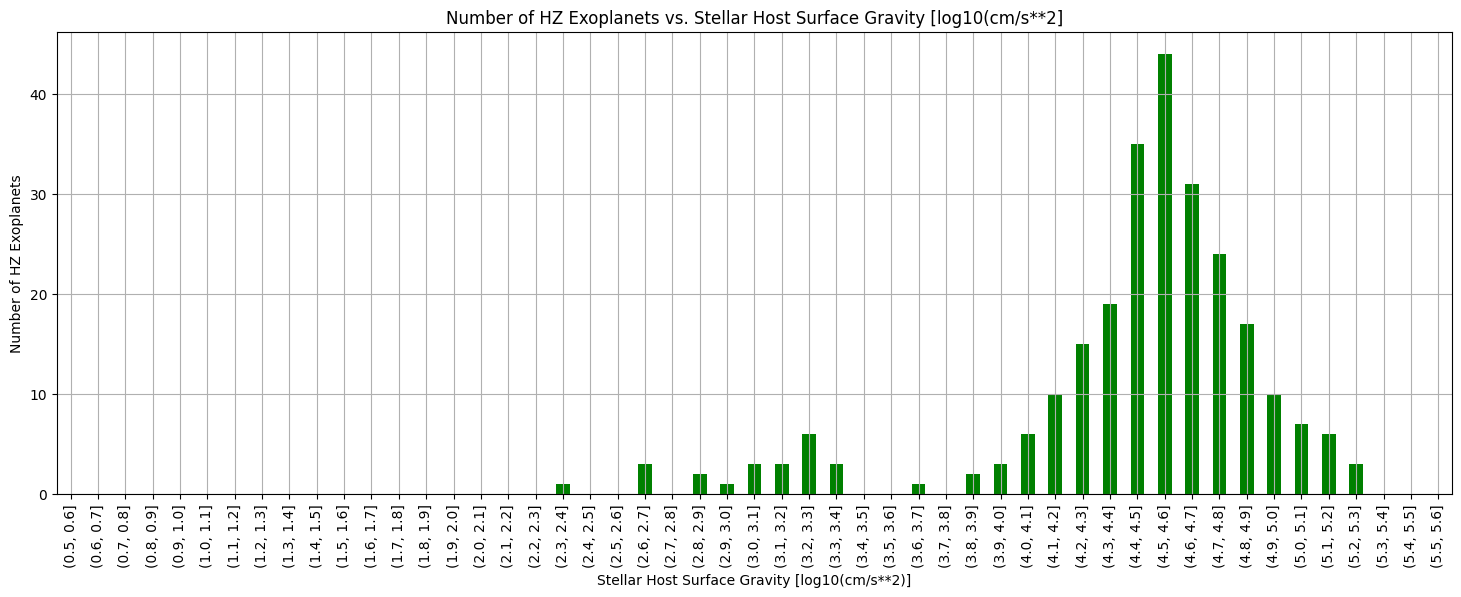

In [145]:
hz_exoplanets_data = exoplanets_data_with_host_star_ages.loc[(exoplanets_data_with_host_star_ages['pl_hz_status'] == 'In HZ')]
stellar_with_hz_exoplanet_surface_gravity_dist = pd.cut(hz_exoplanets_data['st_logg'], bins=stellar_surface_gravity_buckets)
stellar_with_hz_exoplanet_surface_gravity_dist.value_counts().sort_index().plot(kind='bar',
                                                                                figsize=(18, 6),
                                                                                xlabel='Stellar Host Surface Gravity [log10(cm/s**2)]',
                                                                                ylabel='Number of HZ Exoplanets',
                                                                                title='Number of HZ Exoplanets vs. Stellar Host Surface Gravity [log10(cm/s**2]',
                                                                                color='green',
                                                                                grid=True)
stellar_with_hz_exoplanet_surface_gravity_dist.value_counts().sort_index()

In [146]:
exoplanets_data_with_host_star_ages['st_mass'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

count    5578.000000
mean        0.950190
std         0.423488
min         0.010000
25%         0.790000
50%         0.950000
75%         1.090000
90%         1.280000
95%         1.460000
99%         2.070000
99.5%       2.533450
99.9%       4.807600
max        10.940000
Name: st_mass, dtype: float64

st_mass
(0.0, 0.1]      45
(0.1, 0.2]      77
(0.2, 0.3]      80
(0.3, 0.4]     117
(0.4, 0.5]     163
(0.5, 0.6]     234
(0.6, 0.7]     303
(0.7, 0.8]     416
(0.8, 0.9]     821
(0.9, 1.0]    1049
(1.0, 1.1]     904
(1.1, 1.2]     592
(1.2, 1.3]     289
(1.3, 1.4]     151
(1.4, 1.5]     111
(1.5, 1.6]      55
(1.6, 1.7]      38
(1.7, 1.8]      32
(1.8, 1.9]      23
(1.9, 2.0]      16
(2.0, 2.1]      12
(2.1, 2.2]       5
(2.2, 2.3]       5
(2.3, 2.4]       5
(2.4, 2.5]       4
(2.5, 2.6]       7
(2.6, 2.7]       4
(2.7, 2.8]       6
(2.8, 2.9]       2
(2.9, 3.0]       0
(3.0, 3.1]       0
(3.1, 3.2]       0
(3.2, 3.3]       1
(3.3, 3.4]       0
(3.4, 3.5]       1
(3.5, 3.6]       0
(3.6, 3.7]       1
(3.7, 3.8]       1
(3.8, 3.9]       0
(3.9, 4.0]       0
(4.0, 4.1]       0
(4.1, 4.2]       0
(4.2, 4.3]       2
(4.3, 4.4]       0
(4.4, 4.5]       0
(4.5, 4.6]       0
(4.6, 4.7]       0
(4.7, 4.8]       0
Name: count, dtype: int64

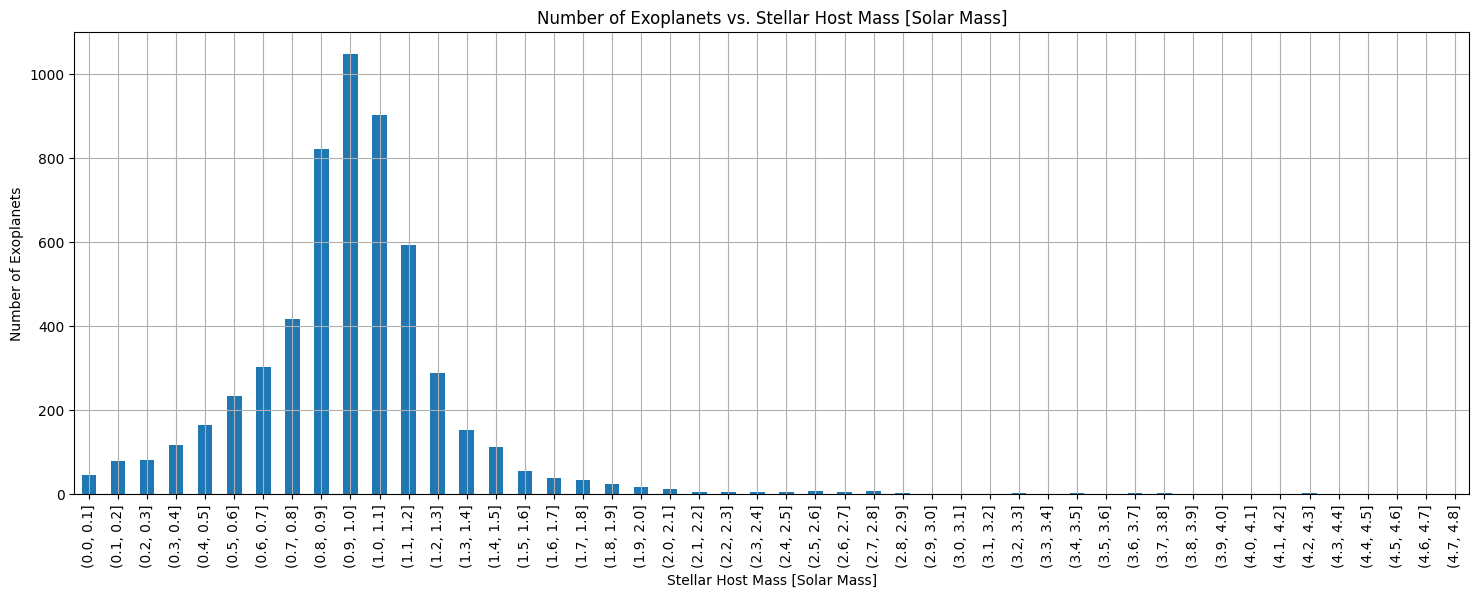

In [148]:
stellar_mass_buckets = create_buckets(0, 4.8, 0.1)
stellar_mass_dist = pd.cut(exoplanets_data_with_host_star_ages['st_mass'], bins=stellar_mass_buckets)
stellar_mass_dist.value_counts().sort_index().plot(kind='bar',
                                                   figsize=(18, 6),
                                                   xlabel='Stellar Host Mass [Solar Mass]',
                                                   ylabel='Number of Exoplanets',
                                                   title='Number of Exoplanets vs. Stellar Host Mass [Solar Mass]',
                                                   grid=True)
stellar_mass_dist.value_counts().sort_index()

st_mass
(0.0, 0.1]     3
(0.1, 0.2]    13
(0.2, 0.3]    10
(0.3, 0.4]    10
(0.4, 0.5]    18
(0.5, 0.6]    12
(0.6, 0.7]    23
(0.7, 0.8]    20
(0.8, 0.9]    40
(0.9, 1.0]    27
(1.0, 1.1]    20
(1.1, 1.2]    16
(1.2, 1.3]    15
(1.3, 1.4]    11
(1.4, 1.5]     3
(1.5, 1.6]     3
(1.6, 1.7]     2
(1.7, 1.8]     2
(1.8, 1.9]     2
(1.9, 2.0]     1
(2.0, 2.1]     2
(2.1, 2.2]     0
(2.2, 2.3]     0
(2.3, 2.4]     2
(2.4, 2.5]     0
(2.5, 2.6]     0
(2.6, 2.7]     1
(2.7, 2.8]     0
(2.8, 2.9]     1
(2.9, 3.0]     0
(3.0, 3.1]     0
(3.1, 3.2]     0
(3.2, 3.3]     0
(3.3, 3.4]     0
(3.4, 3.5]     1
(3.5, 3.6]     0
(3.6, 3.7]     0
(3.7, 3.8]     0
(3.8, 3.9]     0
(3.9, 4.0]     0
(4.0, 4.1]     0
(4.1, 4.2]     0
(4.2, 4.3]     0
(4.3, 4.4]     0
(4.4, 4.5]     0
(4.5, 4.6]     0
(4.6, 4.7]     0
(4.7, 4.8]     0
Name: count, dtype: int64

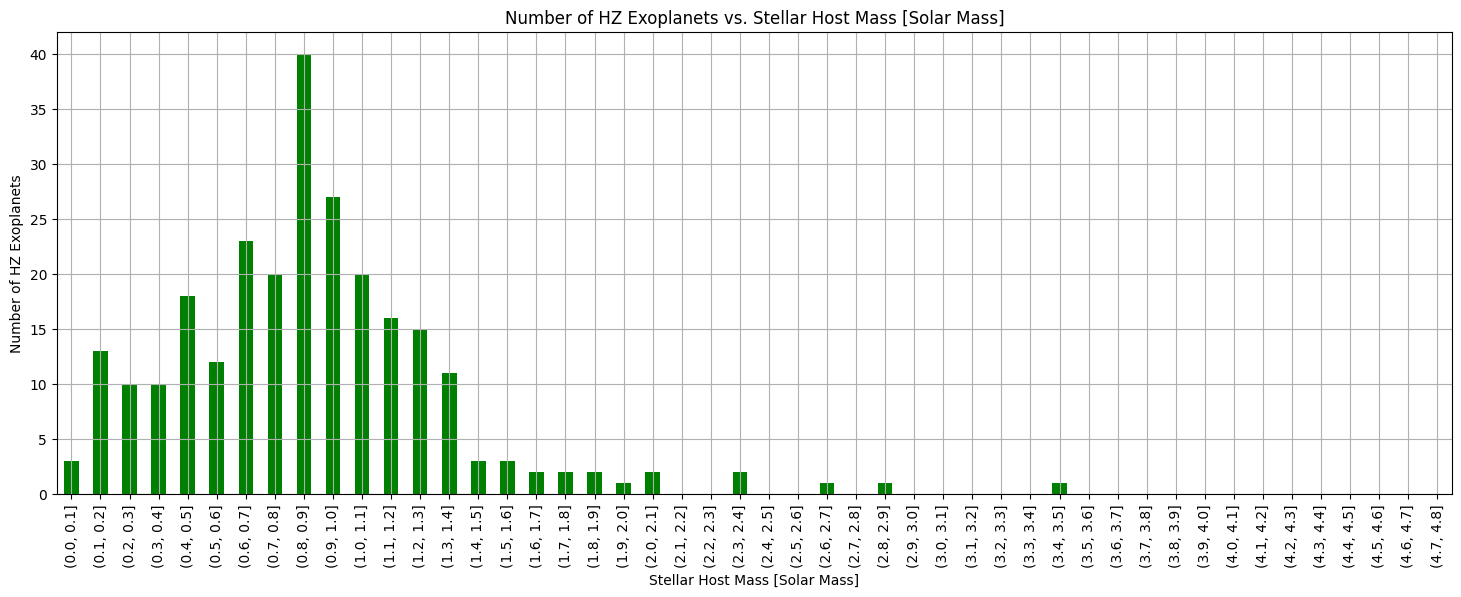

In [149]:
hz_exoplanets_data = exoplanets_data_with_host_star_ages.loc[(exoplanets_data_with_host_star_ages['pl_hz_status'] == 'In HZ')]
stellar_with_hz_exoplanet_mass_dist = pd.cut(hz_exoplanets_data['st_mass'], bins=stellar_mass_buckets)
stellar_with_hz_exoplanet_mass_dist.value_counts().sort_index().plot(kind='bar',
                                                                     figsize=(18, 6),
                                                                     xlabel='Stellar Host Mass [Solar Mass]',
                                                                     ylabel='Number of HZ Exoplanets',
                                                                     title='Number of HZ Exoplanets vs. Stellar Host Mass [Solar Mass]',
                                                                     color='green',
                                                                     grid=True)
stellar_with_hz_exoplanet_mass_dist.value_counts().sort_index()